# **MIS710 Assignment 1 - Road Safety Analysis: Predicting and Addressing Blackspot Incidences in Victoria**

---


**Student:** Cam-Ha Nguyen

**ID:** s223546667


# **1. Business Understandings**

*Business Analysis Core Concept Model applied*

**Change:**

*   The global issue of road accidents has gained prominence in recent years.
*   Road accidents are now the ninth leading cause of death worldwide.
*   There's a significant increase in road fatalities in Australia, particularly in the past year.
*   There's a concerning rise in road deaths on Victorian roads, particularly due to blackspots.

**Need:**

*   There's a need to address the escalating problem of road accidents.
*   It's crucial to analyze and understand the factors contributing to road accidents, especially the presence of blackspots on Victorian roads.
*   The need arises to predict blackspots and uncover underlying accident-causing factors.
*   There's a requirement for collaboration among stakeholders to improve road safety.

**Solution:**

*   The solution involves employing supervised machine learning techniques on a blackspot dataset.
*   VicCrashAnalytics aims to predict the likelihood of blackspots and identify factors leading to accidents.
*   This predictive analysis will provide insights into potential accident-prone areas.
*   The solution involves collaboration with various stakeholders, including the Victorian Department of Transport (DOT), law enforcement agencies, local communities, and road users.

**Stakeholders:**

Stakeholders include:

*   Victorian Department of Transport (DOT)
*   Law enforcement agencies
*   Local communities
*   Road users

**Value:**

Anticipated outcomes include:
*   Substantial improvement in road safety.
*   Reduction in accident rates.
*   Informed allocation of resources for interventions.
*   Data-informed policy decisions.

**Context:**

*   The effort aligns with the Victorian Department of Transport's commitment to enhancing road safety.
*   It fits within broader road safety initiatives.
*   The approach is proactive and data-driven, which is consistent with the goals of the DOT.

# **2. Import Libraries**

In [12]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (
    train_test_split,     # train_test_split: for splitting the dataset
    cross_val_score,      # cross_val_score: for cross-validation
    StratifiedKFold       # StratifiedKFold: for stratified k-fold cross-validation
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Import the statsmodels library for performing statistical modeling and analysis
import statsmodels.api as sm

# **3. Load and Inspect Data**

## **3.1. Load the Dataset**

In [13]:
# Load dataset for Assignment 1 - Blackspot
blackspot_dataset = pd.read_csv("https://raw.githubusercontent.com/camha2912/blackspot-prediction/main/blackspot.csv")
print(blackspot_dataset)

        ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
1      576          BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
3       89                VIGOR STREET                  VIGOR    STREET   
4     8773                FAIRMAN ROAD                FAIRMAN      ROAD   
...    ...                         ...                    ...       ...   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                     0.121

## **3.2. Explore the Dataset**

In [14]:
# View sample size and number of columns
print(blackspot_dataset.shape)
print('Sample size:', blackspot_dataset.shape[0])
print('Number of columns:', blackspot_dataset.shape[1])

(5326, 36)
Sample size: 5326
Number of columns: 36


In [15]:
# Get quick overview of the blackspot_dataset DataFrame
print(blackspot_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

In [16]:
blackspot_dataset.head()

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3699,GROVE ROAD,GROVE,ROAD,0.121988,0.058735,0.228916,0.269578,0.853916,0.320783,...,0.358321,0.0,14.0,non-Intersection,0,0,0,0,0,Blackspot
1,576,BACCHUS MARSH ROAD,BACCHUS MARSH,ROAD,0.215894,0.141722,0.312583,0.201325,0.741722,0.128477,...,0.000000,1.0,0.0,Intersection,0,0,0,1,0,Blackspot
2,758,GRUBBED ROAD,GRUBBED,ROAD,0.185304,0.102236,0.194888,0.348243,0.757188,0.169329,...,1.000000,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
3,89,VIGOR STREET,VIGOR,STREET,0.167763,0.062500,0.286184,0.322368,0.815789,0.161184,...,0.036599,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
4,8773,FAIRMAN ROAD,FAIRMAN,ROAD,0.201238,0.108359,0.204334,0.340557,0.761610,0.145511,...,0.000000,1.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [17]:
blackspot_dataset.tail()

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
5321,256,WARBURTON-WOODS POINT ROAD,WARBURTON-WOODS POINT,ROAD,0.152047,0.087719,0.198830,0.385965,0.812865,0.175439,...,1.0,0.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5322,5182,GLENELG HIGHWAY,GLENELG,HIGHWAY,0.142119,0.090439,0.209302,0.328165,0.816537,0.229974,...,0.0,0.155542,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
5323,4196,CAPE PATERSON ROAD,CAPE PATERSON,ROAD,0.163701,0.106762,0.170819,0.352313,0.779359,0.206406,...,0.0,1.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5324,4352,MCPHANS ROAD,MCPHANS,ROAD,0.155039,0.173127,0.129199,0.310078,0.806202,0.232558,...,0.0,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
5325,223,ROGERS ROAD,ROGERS,ROAD,0.197647,0.129412,0.200000,0.301176,0.764706,0.171765,...,0.0,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [18]:
blackspot_dataset.sample(10)

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
889,4743,DITCHFIELD ROAD,DITCHFIELD,ROAD,0.221453,0.114187,0.224913,0.332180,0.733564,0.107266,...,0.000000,0.065335,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
1863,7171,PARKER ROAD,PARKER,ROAD,0.187234,0.080851,0.187234,0.348936,0.778723,0.195745,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
2575,1454,BANNOCKBURN-SHELFORD ROAD,BANNOCKBURN-SHELFORD,ROAD,0.201238,0.108359,0.204334,0.340557,0.761610,0.145511,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
1066,316,CAIRNS DRIVE,CAIRNS,DRIVE,0.204403,0.198113,0.220126,0.314465,0.732704,0.062893,...,0.000000,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
3379,9291,GARDNER AND HOLMAN ROAD,GARDNER AND HOLMAN,ROAD,0.192771,0.090361,0.219880,0.307229,0.765060,0.189759,...,0.000000,0.080455,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
470,1524,OLD BASE ROAD,OLD BASE,ROAD,0.201238,0.108359,0.204334,0.340557,0.761610,0.145511,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
2449,4228,GOROKE STREET,GOROKE,STREET,0.136076,0.047468,0.155063,0.329114,0.835443,0.332278,...,0.000000,0.264394,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
541,638,DARCY STREET,DARCY,STREET,0.271715,0.142539,0.381960,0.144766,0.677060,0.059020,...,0.000000,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
272,9449,BEACH ROAD,BEACH,ROAD,0.279137,0.075540,0.325180,0.178417,0.687050,0.141727,...,0.000000,0.000000,2.0,non-Intersection,0,0,0,0,0,non-Blackspot
4640,5434,MCCARTHY SPUR ROAD,MCCARTHY SPUR,ROAD,0.096774,0.092742,0.157258,0.334677,0.875000,0.318548,...,0.534747,0.169621,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [19]:
# Rename columns in the dataset
blackspot_dataset.rename(columns={
    'EZI_ROAD_NAME': 'full_road_name',
    'ROAD_NAME': 'road_name',
    'ROAD_TYPE': 'road_type',
    'AGE_LESS_THAN_15YRS_PCNT': 'age_less_15',
    'AGE_15_24YRS_PCNT': 'age_15_24',
    'AGE_25_44YRS_PCNT': 'age_25_44',
    'AGE_45_64YRS_PCNT': 'age_45_64',
    'AGE_18YRS_OVER_PCNT': 'age_18_plus',
    'AGE_65YRS_OVER_PCNT': 'age_65_plus',
    'SEO_PERSONS_PCNT': 'english_speakers',
    'FC_COUPLE_WITH_CHILDREN_PCNT': 'couples_no_children',
    'FC_COUPLE_NO_CHILDREN_PCNT': 'couples_with_children',
    'FC_SINGLE_PARENT': 'single_parent_households',
    'CARS_ZERO_HH_PCNT': 'no_cars_households',
    'CARS_ONE_HH_PCNT': 'one_car_households',
    'CARS_TWO_OR_MORE_HH_PCNT': 'two_plus_car_households',
    'DWELLING_SEP_HOUSE_PCNT': 'separate_houses',
    'DWELLING_SEMID_RO_OR_TCE_H_TH_P': 'semi_detached_terrace_houses',
    'DWELLING_FLAT_UNIT_APART_PCNT': 'apartments_flats_units',
    'OCCUPATION_WHITE_COLLAR_PCNT': 'white_collar_occupation',
    'OCCUPATION_BLUE_COLLAR_PCNT': 'blue_collar_occupation',
    'SEIFA': 'socioeconomic_index',
    'Commercial%': 'commercial_land_use',
    'Industrial%': 'industrial_land_use',
    'Residential%': 'residential_land_use',
    'Parkland%': 'parkland_land_use',
    'Primary_Production%': 'primary_production_land_use',
    'Lq_Licenses': 'liquor_license_venues',
    'Supermarket': 'has_supermarket',
    'primary_school': 'has_primary_school',
    'secondary_school': 'has_secondary_school',
    'km_post': 'has_speed_sign',
    'traffic_signal': 'has_traffic_signal',
    'Intersection': 'intersection',
    'Blackspot': 'blackspot'
     },
    inplace=True)

print(blackspot_dataset.columns)

Index(['ID', 'full_road_name', 'road_name', 'road_type', 'age_less_15',
       'age_15_24', 'age_25_44', 'age_45_64', 'age_18_plus', 'age_65_plus',
       'english_speakers', 'couples_with_children', 'couples_no_children',
       'single_parent_households', 'no_cars_households', 'one_car_households',
       'two_plus_car_households', 'separate_houses',
       'semi_detached_terrace_houses', 'apartments_flats_units',
       'white_collar_occupation', 'blue_collar_occupation',
       'socioeconomic_index', 'commercial_land_use', 'industrial_land_use',
       'residential_land_use', 'parkland_land_use',
       'primary_production_land_use', 'liquor_license_venues', 'intersection',
       'has_supermarket', 'has_primary_school', 'has_secondary_school',
       'has_speed_sign', 'has_traffic_signal', 'blackspot'],
      dtype='object')


In [20]:
# Define a dictionary to map 1 to "Yes" and 0 to "No"
yes_no_mapping = {1: "Yes", 0: "No"}

# Convert the columns to "Yes" and "No" using the mapping
blackspot_dataset['has_supermarket'] = blackspot_dataset['has_supermarket'].replace(yes_no_mapping)
blackspot_dataset['has_primary_school'] = blackspot_dataset['has_primary_school'].replace(yes_no_mapping)
blackspot_dataset['has_secondary_school'] = blackspot_dataset['has_secondary_school'].replace(yes_no_mapping)
blackspot_dataset['has_speed_sign'] = blackspot_dataset['has_speed_sign'].replace(yes_no_mapping)
blackspot_dataset['has_traffic_signal'] = blackspot_dataset['has_traffic_signal'].replace(yes_no_mapping)

## **3.3. Inspect and Handle Missing Data**

In [21]:
# Calculate and display the number of missing values in each column of the blackspot_dataset
print(blackspot_dataset.isna().sum().sort_values(ascending=False))

age_65_plus                     9
liquor_license_venues           6
primary_production_land_use     0
blue_collar_occupation          0
socioeconomic_index             0
commercial_land_use             0
industrial_land_use             0
residential_land_use            0
parkland_land_use               0
ID                              0
apartments_flats_units          0
intersection                    0
has_supermarket                 0
has_primary_school              0
has_secondary_school            0
has_speed_sign                  0
has_traffic_signal              0
white_collar_occupation         0
semi_detached_terrace_houses    0
full_road_name                  0
age_18_plus                     0
road_name                       0
road_type                       0
age_less_15                     0
age_15_24                       0
age_25_44                       0
age_45_64                       0
english_speakers                0
separate_houses                 0
couples_with_c

In [22]:
# Calculate the threshold for acceptable missing data based on 5% of the total number of rows in the blackspot_dataset
threshold = round(len(blackspot_dataset) * 0.05)
print(threshold)

266


In [23]:
# Delete rows with missing data for the columns with missing values fewer than or equal to the calculated threshold
cols_to_drop = blackspot_dataset.columns[blackspot_dataset.isna().sum() <= threshold]
blackspot_dataset.dropna(subset=['age_65_plus', 'liquor_license_venues'], inplace=True)

print(blackspot_dataset.isnull().sum().sort_values(ascending=False))

ID                              0
full_road_name                  0
white_collar_occupation         0
blue_collar_occupation          0
socioeconomic_index             0
commercial_land_use             0
industrial_land_use             0
residential_land_use            0
parkland_land_use               0
primary_production_land_use     0
liquor_license_venues           0
intersection                    0
has_supermarket                 0
has_primary_school              0
has_secondary_school            0
has_speed_sign                  0
has_traffic_signal              0
apartments_flats_units          0
semi_detached_terrace_houses    0
separate_houses                 0
age_18_plus                     0
road_name                       0
road_type                       0
age_less_15                     0
age_15_24                       0
age_25_44                       0
age_45_64                       0
age_65_plus                     0
two_plus_car_households         0
english_speake

## **3.4. Inspect and Remove Duplicates**

In [24]:
# Check for duplicate rows based on all columns
duplicate_rows = blackspot_dataset[blackspot_dataset.duplicated()]

print("Duplicate rows based on all columns:")
print(duplicate_rows)

Duplicate rows based on all columns:
Empty DataFrame
Columns: [ID, full_road_name, road_name, road_type, age_less_15, age_15_24, age_25_44, age_45_64, age_18_plus, age_65_plus, english_speakers, couples_with_children, couples_no_children, single_parent_households, no_cars_households, one_car_households, two_plus_car_households, separate_houses, semi_detached_terrace_houses, apartments_flats_units, white_collar_occupation, blue_collar_occupation, socioeconomic_index, commercial_land_use, industrial_land_use, residential_land_use, parkland_land_use, primary_production_land_use, liquor_license_venues, intersection, has_supermarket, has_primary_school, has_secondary_school, has_speed_sign, has_traffic_signal, blackspot]
Index: []

[0 rows x 36 columns]


## **3.5. Inspect and Handle Outliers**

In [25]:
# Define numeric columns to check for outliers
columns_to_check = blackspot_dataset.select_dtypes(include=['number']).columns.tolist()

# Calculate the IQR for each column
Q1 = blackspot_dataset[columns_to_check].quantile(0.25)
Q3 = blackspot_dataset[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
outlier_threshold = 1.5

# Find outliers in each column
outliers = ((blackspot_dataset[columns_to_check] < (Q1 - outlier_threshold * IQR)) |
            (blackspot_dataset[columns_to_check] > (Q3 + outlier_threshold * IQR)))

# Print rows with outliers
rows_with_outliers = blackspot_dataset[outliers.any(axis=1)]
print("Rows with outliers:")
print(rows_with_outliers)

# Print the number of rows with outliers
num_rows_with_outliers = outliers.any(axis=1).sum()
print("Number of rows with outliers:", num_rows_with_outliers)

Rows with outliers:
        ID              full_road_name              road_name road_type  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
7     6127              BENNETT STREET                BENNETT    STREET   
8     4140                   PIER ROAD                   PIER      ROAD   
9     3864               GORDON STREET                 GORDON    STREET   
...    ...                         ...                    ...       ...   
5306  2067              FISCHER STREET                FISCHER    STREET   
5309   547               SYDNEY STREET                 SYDNEY    STREET   
5316  3819              TULLOCH STREET                TULLOCH    STREET   
5318  2878              MCHAFFIE DRIVE               MCHAFFIE     DRIVE   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   

      age_less_15  age_15_24  age_25_44  age_45_64  age_18_plus  age_65_plus  \

In [26]:
# Define percentage columns to check
columns_to_check = ['age_less_15', 'age_15_24', 'age_25_44', 'age_45_64', 'age_18_plus', 'age_65_plus',
                    'english_speakers', 'couples_no_children', 'couples_with_children', 'single_parent_households',
                    'no_cars_households', 'one_car_households', 'two_plus_car_households', 'separate_houses',
                    'semi_detached_terrace_houses', 'apartments_flats_units', 'white_collar_occupation',
                    'blue_collar_occupation', 'commercial_land_use', 'industrial_land_use', 'residential_land_use',
                    'parkland_land_use', 'primary_production_land_use']

# Set options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Find rows with values > 1 in any of the specified columns
abnormal_rows = blackspot_dataset[blackspot_dataset[columns_to_check].gt(1).any(axis=1)]

# Print rows with exceeding values
print("Rows with abnormal cell values:")
print(abnormal_rows)

# Remove rows with abnormal cell values
blackspot_dataset.drop(abnormal_rows.index, inplace=True)

print("\nDataset shape after removal:", blackspot_dataset.shape)

Rows with abnormal cell values:
        ID full_road_name road_name road_type  age_less_15  age_15_24  age_25_44  age_45_64  age_18_plus  age_65_plus  english_speakers  couples_with_children  couples_no_children  single_parent_households  no_cars_households  one_car_households  two_plus_car_households  separate_houses  semi_detached_terrace_houses  apartments_flats_units  white_collar_occupation  blue_collar_occupation  socioeconomic_index  commercial_land_use  industrial_land_use  residential_land_use  parkland_land_use  primary_production_land_use  liquor_license_venues  intersection has_supermarket has_primary_school has_secondary_school has_speed_sign has_traffic_signal      blackspot
4728  1960   COOMBES ROAD   COOMBES      ROAD          0.0        0.0        0.0   0.119497          1.0     0.880503          0.980263               1.088235                  0.0                       0.0            0.060241            0.650602                 0.289157              1.0               

In [27]:
# Display the sample size and number of columns in the updated dataset after handling missing values and duplicates
print('Sample size:', blackspot_dataset.shape[0])
print('Number of columns:', blackspot_dataset.shape[1])

Sample size: 5310
Number of columns: 36


# **4. Conduct Exploratory Data Analysis - EDA**

## **4.1. Univariate Analysis**

In [28]:
# Descriptive stats for numerical variables
blackspot_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5310.0,4999.970998,2885.681433,1.0,2486.250000,5029.500000,7484.250000,9999.000000
age_less_15,5310.0,0.175502,0.050534,0.0,0.144847,0.177419,0.205950,0.329241
age_15_24,5310.0,0.099517,0.030943,0.0,0.079433,0.102041,0.123007,0.198113
age_25_44,5310.0,0.203070,0.054583,0.0,0.174387,0.197248,0.234884,0.608696
age_45_64,5310.0,0.306903,0.067671,0.0,0.273973,0.317073,0.348189,0.490798
age_18_plus,5310.0,0.773975,0.102071,0.0,0.751415,0.778723,0.816156,1.000000
age_65_plus,5310.0,0.202390,0.104830,0.0,0.149367,0.181102,0.237288,1.000000
english_speakers,5310.0,0.884916,0.107604,0.0,0.870588,0.896985,0.927536,1.000000
couples_with_children,5310.0,0.443319,0.105416,0.0,0.387283,0.450000,0.500000,0.720721
couples_no_children,5310.0,0.401514,0.114788,0.0,0.342105,0.406977,0.477124,0.785714


In [29]:
# Set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

blackspot_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5310.000,4999.971,2885.681,1.000,2486.250,5029.500,7484.250,9999.000
age_less_15,5310.000,0.176,0.051,0.000,0.145,0.177,0.206,0.329
age_15_24,5310.000,0.100,0.031,0.000,0.079,0.102,0.123,0.198
age_25_44,5310.000,0.203,0.055,0.000,0.174,0.197,0.235,0.609
age_45_64,5310.000,0.307,0.068,0.000,0.274,0.317,0.348,0.491
age_18_plus,5310.000,0.774,0.102,0.000,0.751,0.779,0.816,1.000
age_65_plus,5310.000,0.202,0.105,0.000,0.149,0.181,0.237,1.000
english_speakers,5310.000,0.885,0.108,0.000,0.871,0.897,0.928,1.000
couples_with_children,5310.000,0.443,0.105,0.000,0.387,0.450,0.500,0.721
couples_no_children,5310.000,0.402,0.115,0.000,0.342,0.407,0.477,0.786


### **4.1.1. Explore numerical variables**

In [30]:
# Get the numerical columns, excluding 'ID'
blackspot_numerical_columns = blackspot_dataset.drop(columns=['ID']).select_dtypes(include=[int, float])

# Get the summary statistics for the numerical columns
blackspot_numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
age_less_15,5310.000,0.176,0.051,0.000,0.145,0.177,0.206,0.329
age_15_24,5310.000,0.100,0.031,0.000,0.079,0.102,0.123,0.198
age_25_44,5310.000,0.203,0.055,0.000,0.174,0.197,0.235,0.609
age_45_64,5310.000,0.307,0.068,0.000,0.274,0.317,0.348,0.491
age_18_plus,5310.000,0.774,0.102,0.000,0.751,0.779,0.816,1.000
age_65_plus,5310.000,0.202,0.105,0.000,0.149,0.181,0.237,1.000
english_speakers,5310.000,0.885,0.108,0.000,0.871,0.897,0.928,1.000
couples_with_children,5310.000,0.443,0.105,0.000,0.387,0.450,0.500,0.721
couples_no_children,5310.000,0.402,0.115,0.000,0.342,0.407,0.477,0.786
single_parent_households,5310.000,0.127,0.066,0.000,0.077,0.125,0.169,0.500


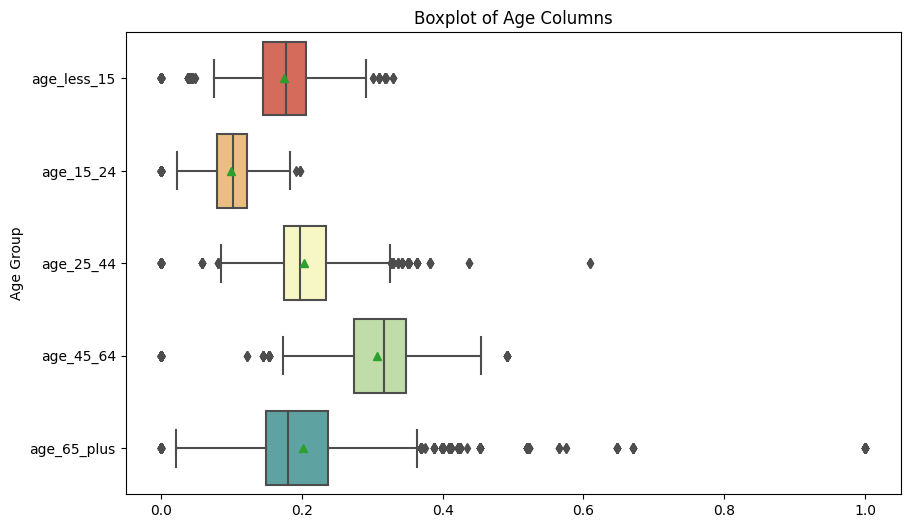

In [31]:
# Create boxplots for Demographic-Age columns
age_cols = ['age_less_15', 'age_15_24', 'age_25_44', 'age_45_64', 'age_65_plus']

plt.figure(figsize=(10, 6))
sns.boxplot(data=blackspot_dataset[age_cols], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Age Columns")
plt.ylabel("Age Group")
plt.show()

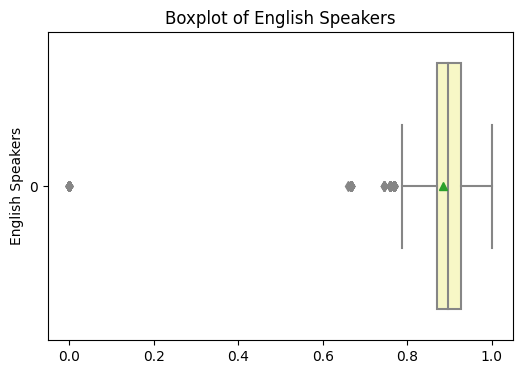

In [32]:
# Create boxplot for Demographic-English Speaker column
plt.figure(figsize=(6, 4))
sns.boxplot(data=blackspot_dataset['english_speakers'], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of English Speakers")
plt.ylabel("English Speakers")
plt.show()

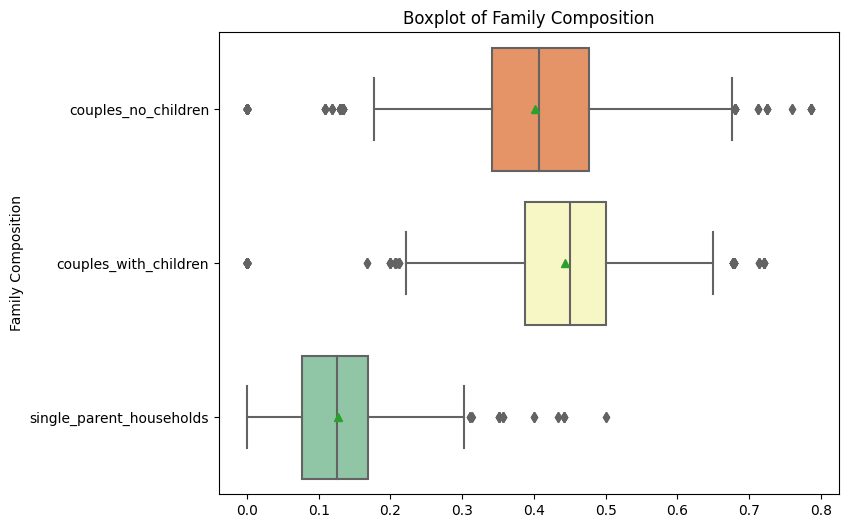

In [33]:
# Create boxplots for Demographic-Family Composition columns
family_composition_cols = ['couples_no_children', 'couples_with_children', 'single_parent_households']

plt.figure(figsize=(8, 6))
sns.boxplot(data=blackspot_dataset[family_composition_cols], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Family Composition")
plt.ylabel("Family Composition")
plt.show()

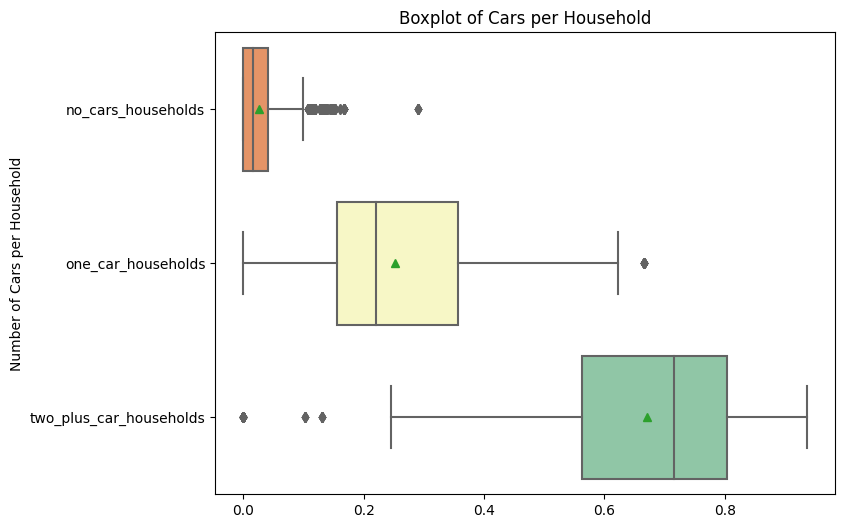

In [34]:
# Create boxplots for Demographic-Cars columns
cars_cols = ['no_cars_households', 'one_car_households', 'two_plus_car_households']

plt.figure(figsize=(8, 6))
sns.boxplot(data=blackspot_dataset[cars_cols], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Cars per Household")
plt.ylabel("Number of Cars per Household")
plt.show()

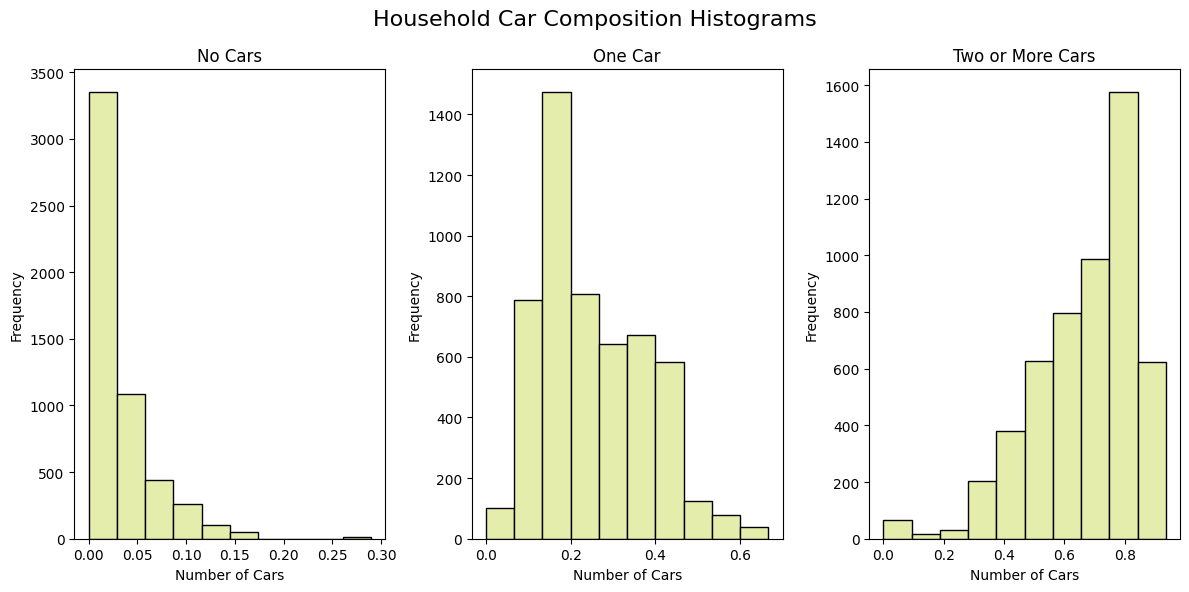

In [35]:
# Create histograms for Demographic-Cars columns
plt.figure(figsize=(12, 6))

custom_cars_hist_titles = {
    'no_cars_households': "No Cars",
    'one_car_households': "One Car",
    'two_plus_car_households': "Two or More Cars"
}

for i, col in enumerate(cars_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(blackspot_dataset[col], bins=10, color='#E5EDAD', edgecolor='black')
    plt.title(custom_cars_hist_titles[col])
    plt.xlabel("Number of Cars")
    plt.ylabel("Frequency")

plt.suptitle("Household Car Composition Histograms", fontsize=16)
plt.tight_layout()
plt.show()

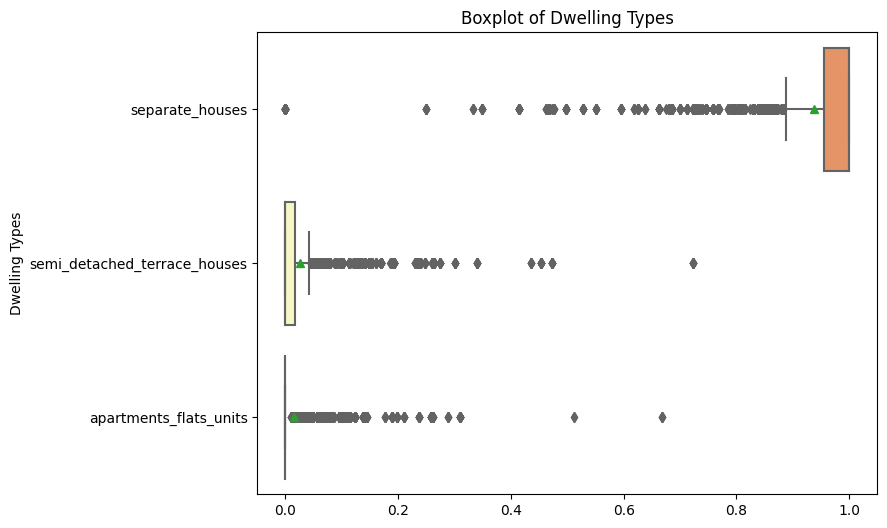

In [36]:
# Create boxplots for Demographic-Dwellings columns
dwelling_cols = ['separate_houses', 'semi_detached_terrace_houses', 'apartments_flats_units']

plt.figure(figsize=(8, 6))
sns.boxplot(data=blackspot_dataset[dwelling_cols], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Dwelling Types")
plt.ylabel("Dwelling Types")
plt.show()

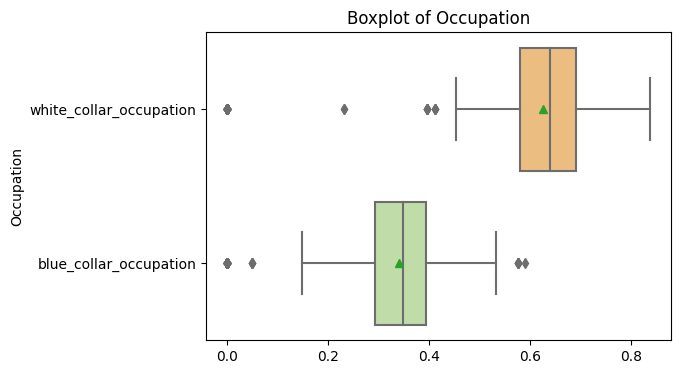

In [37]:
# Create boxplots for Demographic-Occupation columns
occupation_cols = ['white_collar_occupation', 'blue_collar_occupation']

plt.figure(figsize=(6, 4))
sns.boxplot(data=blackspot_dataset[occupation_cols], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Occupation")
plt.ylabel("Occupation")
plt.show()

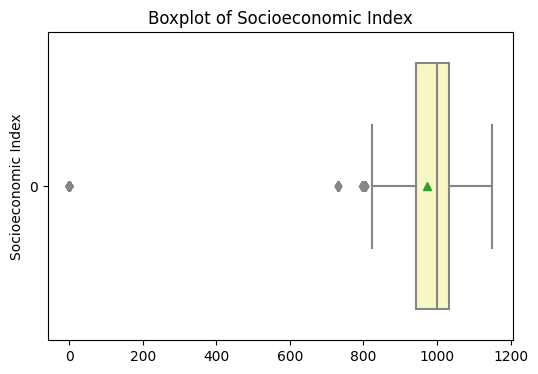

In [38]:
# Create boxplot for Demographic-Socialeconomic Index columns
plt.figure(figsize=(6, 4))
sns.boxplot(data=blackspot_dataset['socioeconomic_index'], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Socioeconomic Index")
plt.ylabel("Socioeconomic Index")
plt.show()

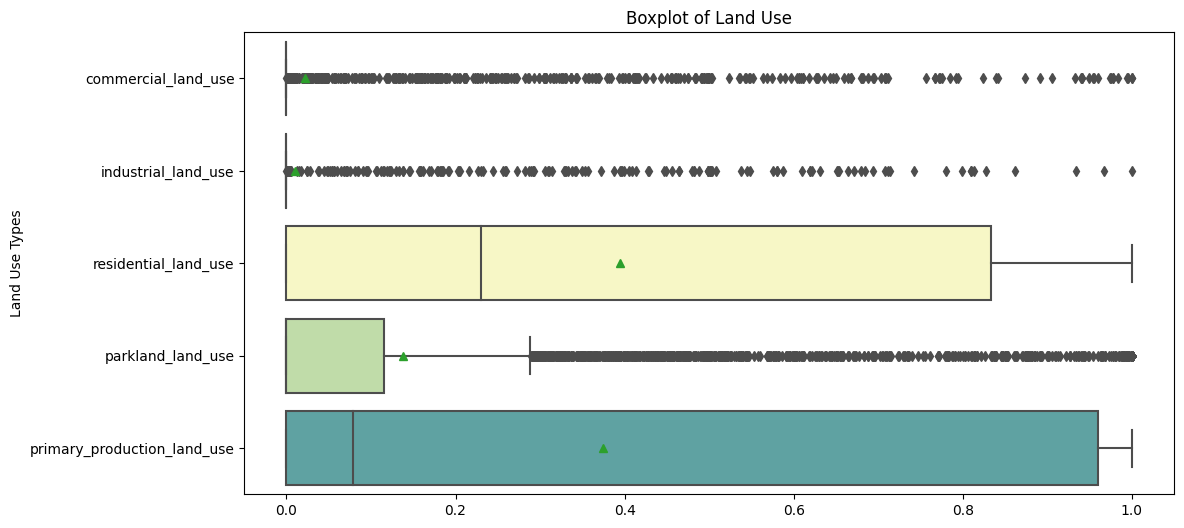

In [39]:
# Create boxplots for Land Use columns
land_use_cols = ['commercial_land_use', 'industrial_land_use', 'residential_land_use', 'parkland_land_use', 'primary_production_land_use']

plt.figure(figsize=(12, 6))
sns.boxplot(data=blackspot_dataset[land_use_cols], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Land Use")
plt.ylabel("Land Use Types")
plt.show()

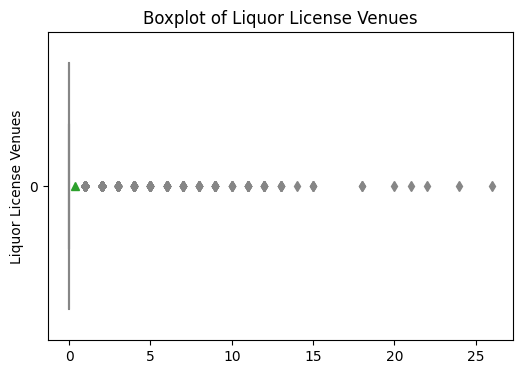

In [40]:
# Create boxplot for Liquor License Venues column
plt.figure(figsize=(6, 4))
sns.boxplot(data=blackspot_dataset['liquor_license_venues'], showmeans=True, palette='Spectral', orient='h')
plt.title("Boxplot of Liquor License Venues")
plt.ylabel("Liquor License Venues")
plt.show()

Text(0, 0.5, 'Frequency')

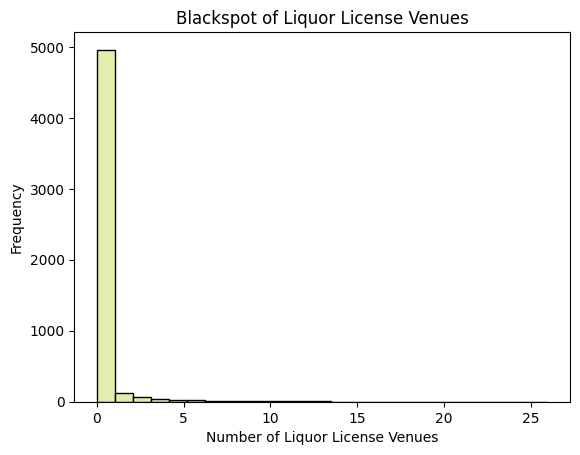

In [41]:
plt.hist(blackspot_dataset['liquor_license_venues'], bins=25, color='#E5EDAD', edgecolor='black')
plt.title("Blackspot of Liquor License Venues")
plt.xlabel("Number of Liquor License Venues")
plt.ylabel("Frequency")

### **4.1.2 Explore categorical variables**

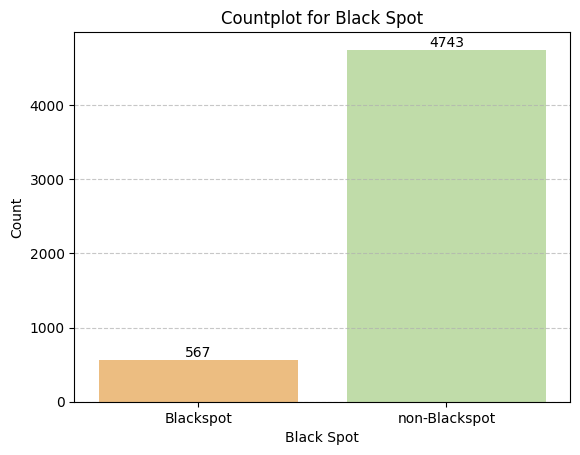

Counts of Blackspots and Non-Blackspots:
non-Blackspot    4743
Blackspot         567
Name: blackspot, dtype: int64

Percentage of Blackspots and Non-Blackspots:
Percentage of Blackspots: 10.68%
Percentage of Non-Blackspots: 89.32%


In [42]:
# Describe categorical variable 'blackspot'
sns.countplot(data=blackspot_dataset, x='blackspot', palette='Spectral')
plt.title("Countplot for Black Spot")
plt.xlabel("Black Spot")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.show()

blackspot_counts = blackspot_dataset['blackspot'].value_counts()
print("Counts of Blackspots and Non-Blackspots:")
print(blackspot_counts)

# Calculate the percentage of blackspots and non-blackspots
total_records = blackspot_counts.sum()
percentage_blackspot = (blackspot_counts['Blackspot'] / total_records) * 100
percentage_non_blackspot = (blackspot_counts['non-Blackspot'] / total_records) * 100

print("\nPercentage of Blackspots and Non-Blackspots:")
print(f"Percentage of Blackspots: {percentage_blackspot:.2f}%")
print(f"Percentage of Non-Blackspots: {percentage_non_blackspot:.2f}%")

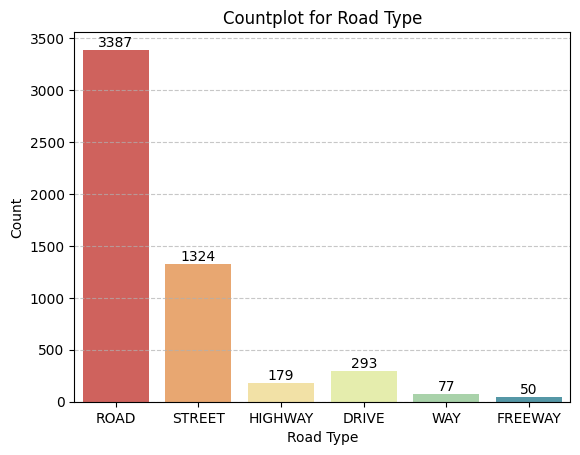

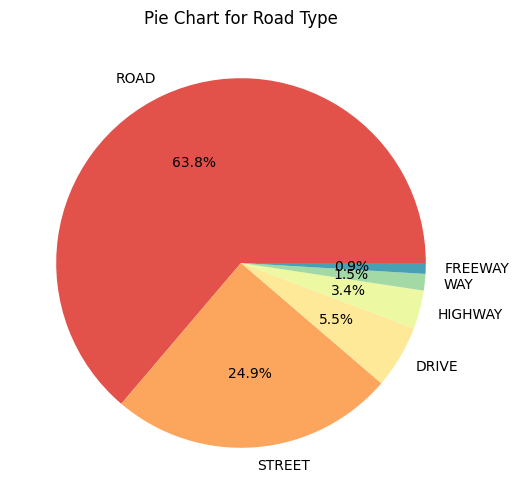

ROAD       3387
STREET     1324
DRIVE       293
HIGHWAY     179
WAY          77
FREEWAY      50
Name: road_type, dtype: int64

In [43]:
# Describe categorical variable 'road_type' using countplot
sns.countplot(data=blackspot_dataset, x='road_type', palette='Spectral')
plt.title("Countplot for Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax = plt.gca()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.show()

# Describe categorical variable 'road_type' using pie chart
plt.figure(figsize=(8, 6))
plt.pie(blackspot_dataset['road_type'].value_counts(), labels=blackspot_dataset['road_type'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Spectral'))
plt.title("Pie Chart for Road Type")
plt.show()

blackspot_dataset['road_type'].value_counts()

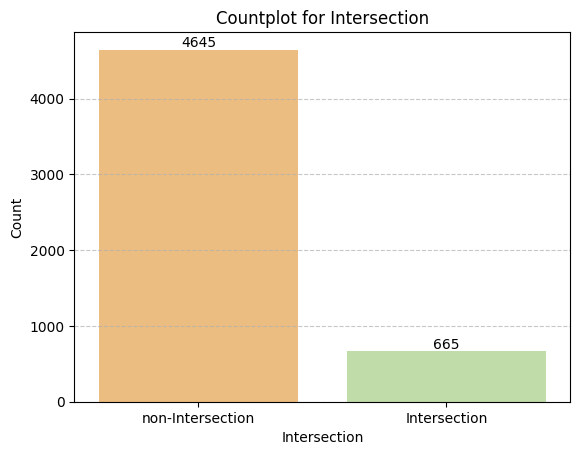

non-Intersection    4645
Intersection         665
Name: intersection, dtype: int64

In [44]:
# Describe categorical variable 'intersection'
sns.countplot(data=blackspot_dataset, x='intersection', palette='Spectral')
plt.title("Countplot for Intersection")
plt.xlabel("Intersection")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.show()

blackspot_dataset['intersection'].value_counts()

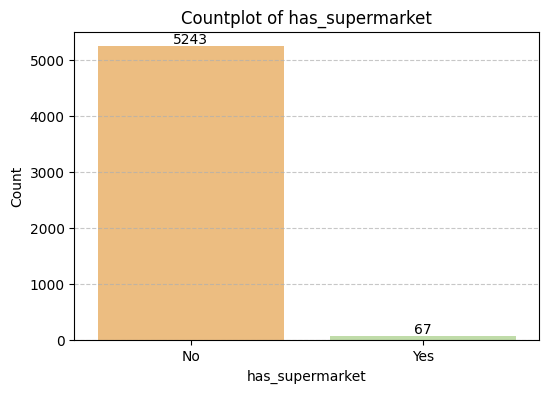

No     5243
Yes      67
Name: has_supermarket, dtype: int64


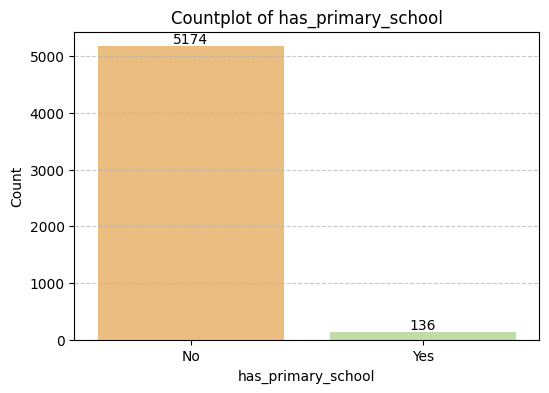

No     5174
Yes     136
Name: has_primary_school, dtype: int64


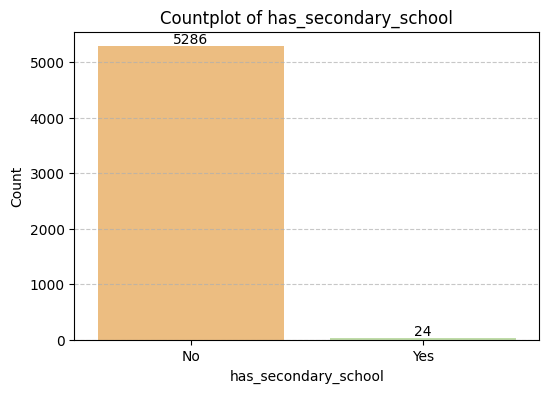

No     5286
Yes      24
Name: has_secondary_school, dtype: int64


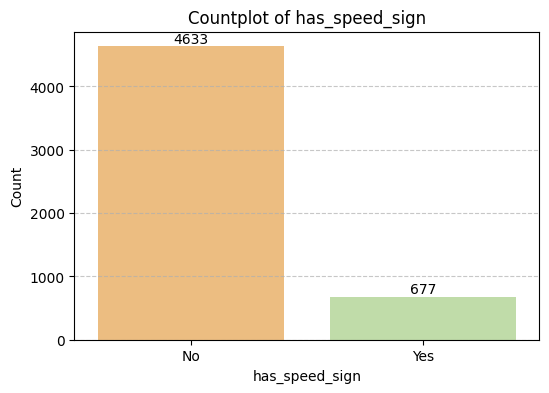

No     4633
Yes     677
Name: has_speed_sign, dtype: int64


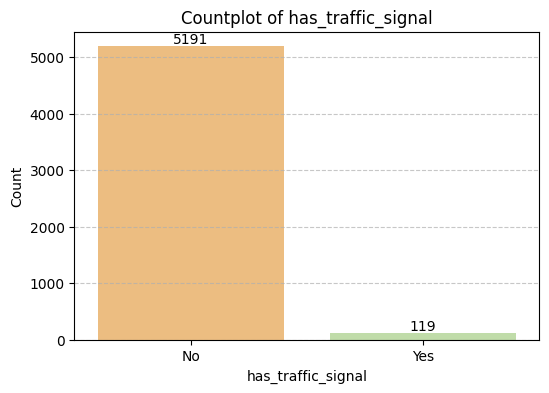

No     5191
Yes     119
Name: has_traffic_signal, dtype: int64


In [45]:
# Select columns to plot
columns_to_plot = ['has_supermarket', 'has_primary_school', 'has_secondary_school', 'has_speed_sign', 'has_traffic_signal']

# Create countplot for each column
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=blackspot_dataset, x=col, palette='Spectral')
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    # Add counts above each bar in the countplot
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    print(blackspot_dataset[col].value_counts())

## **4.2. Bivariate Analysis**

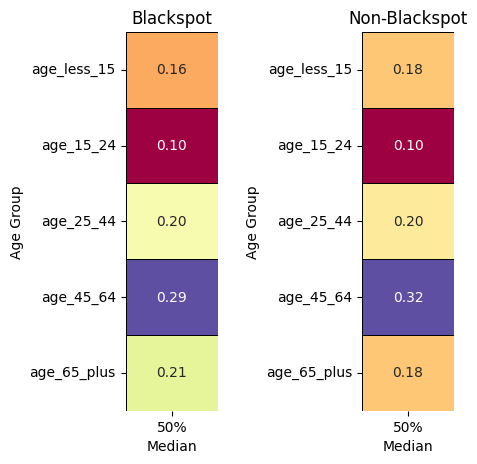

In [46]:
# Filter rows for blackspots and non-blackspots
blackspot = blackspot_dataset[blackspot_dataset['blackspot'] == 'Blackspot'][age_cols].describe().T
non_blackspot = blackspot_dataset[blackspot_dataset['blackspot'] == 'non-Blackspot'][age_cols].describe().T

# Create subplots for visualizing the mean of probability for each age group
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
plt.subplot(1, 2, 1)
sns.heatmap(blackspot[['50%']], annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', cmap='Spectral', xticklabels=True, yticklabels=True)
plt.title('Blackspot')
plt.xlabel("Median")
plt.ylabel("Age Group")

plt.subplot(1, 2, 2)
sns.heatmap(non_blackspot[['50%']], annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', cmap='Spectral', xticklabels=True, yticklabels=True)
plt.title('Non-Blackspot')
plt.xlabel("Median")
plt.ylabel("Age Group")

fig.tight_layout(pad = 2)

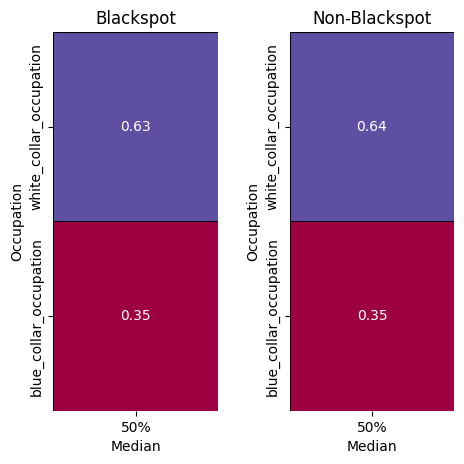

In [47]:
# Filter rows for blackspots and non-blackspots
blackspot = blackspot_dataset[blackspot_dataset['blackspot'] == 'Blackspot'][occupation_cols].describe().T
non_blackspot = blackspot_dataset[blackspot_dataset['blackspot'] == 'non-Blackspot'][occupation_cols].describe().T

# Create subplots for visualizing the mean of probability for each occupation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
plt.subplot(1, 2, 1)
sns.heatmap(blackspot[['50%']], annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', cmap='Spectral', xticklabels=True, yticklabels=True)
plt.title('Blackspot')
plt.xlabel("Median")
plt.ylabel("Occupation")

plt.subplot(1, 2, 2)
sns.heatmap(non_blackspot[['50%']], annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', cmap='Spectral', xticklabels=True, yticklabels=True)
plt.title('Non-Blackspot')
plt.xlabel("Median")
plt.ylabel("Occupation")

fig.tight_layout(pad = 2)

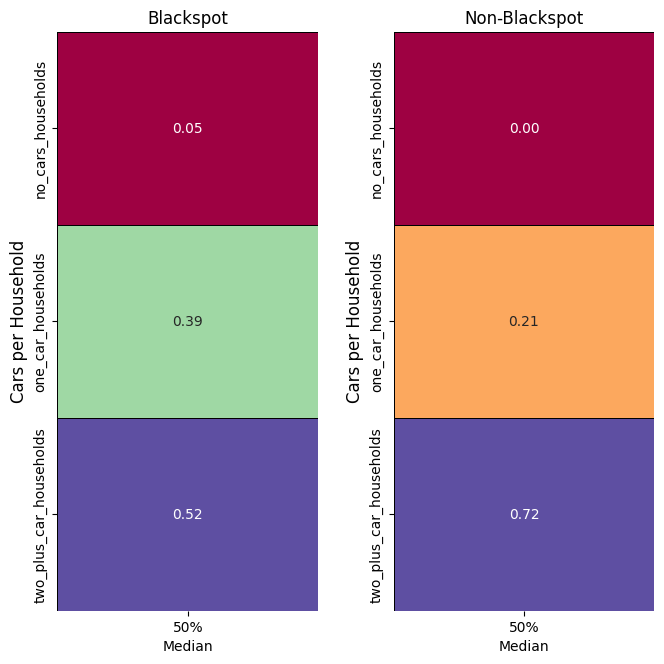

In [48]:
# Filter rows for blackspots and non-blackspots
blackspot = blackspot_dataset[blackspot_dataset['blackspot'] == 'Blackspot'][cars_cols].describe().T
non_blackspot = blackspot_dataset[blackspot_dataset['blackspot'] == 'non-Blackspot'][cars_cols].describe().T

# Create subplots for visualizing the mean of probability for each occupation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))
plt.subplot(1, 2, 1)
sns.heatmap(blackspot[['50%']], annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', cmap='Spectral', xticklabels=True, yticklabels=True)
plt.title('Blackspot')
plt.xlabel("Median")
plt.ylabel("Cars per Household", fontsize=12)

plt.subplot(1, 2, 2)
sns.heatmap(non_blackspot[['50%']], annot=True, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', cmap='Spectral', xticklabels=True, yticklabels=True)
plt.title('Non-Blackspot')
plt.xlabel("Median")
plt.ylabel("Cars per Household", fontsize=12)

fig.tight_layout(pad = 2)

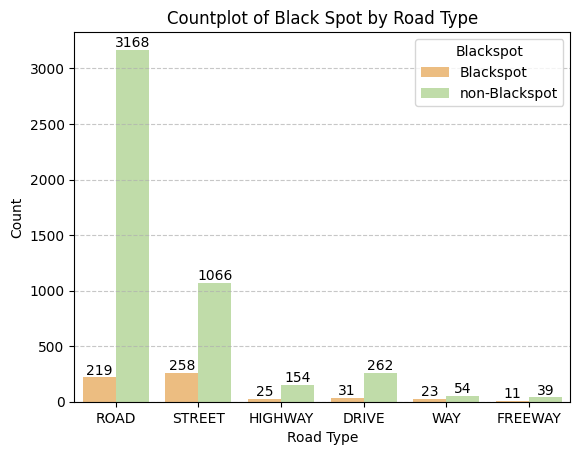

Road Type: ROAD
Blackspot Ratio: 0.06
Non-Blackspot Ratio: 0.94

Road Type: STREET
Blackspot Ratio: 0.19
Non-Blackspot Ratio: 0.81

Road Type: HIGHWAY
Blackspot Ratio: 0.14
Non-Blackspot Ratio: 0.86

Road Type: DRIVE
Blackspot Ratio: 0.11
Non-Blackspot Ratio: 0.89

Road Type: WAY
Blackspot Ratio: 0.30
Non-Blackspot Ratio: 0.70

Road Type: FREEWAY
Blackspot Ratio: 0.22
Non-Blackspot Ratio: 0.78



In [49]:
# Visualize distribution of Black Spot by Road Type
sns.countplot(data=blackspot_dataset, x='road_type', hue='blackspot', palette='Spectral')
plt.title("Countplot of Black Spot by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.legend(title="Blackspot", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.show()

# Calculate the ratio of blackspot and non-blackspot cases for each road type and print out the results
total_counts = blackspot_dataset['road_type'].value_counts()
for road_type in blackspot_dataset['road_type'].unique():
    blackspot_count = blackspot_dataset[(blackspot_dataset['road_type'] == road_type) & (blackspot_dataset['blackspot'] == 'Blackspot')].shape[0]
    non_blackspot_count = total_counts[road_type] - blackspot_count
    total_count = total_counts[road_type]
    blackspot_ratio = blackspot_count / total_count
    non_blackspot_ratio = non_blackspot_count / total_count
    print(f"Road Type: {road_type}")
    print(f"Blackspot Ratio: {blackspot_ratio:.2f}")
    print(f"Non-Blackspot Ratio: {non_blackspot_ratio:.2f}\n")

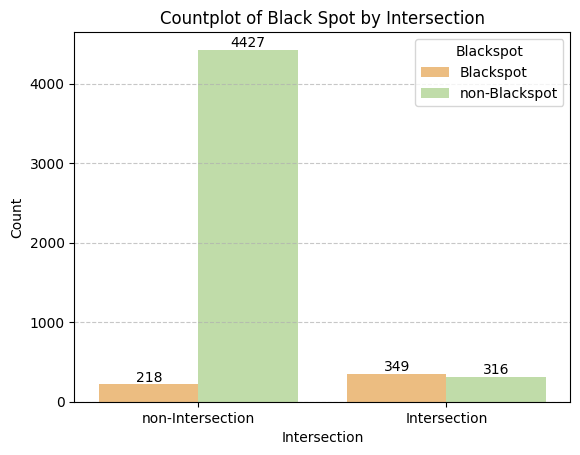

In [50]:
# Visualize distribution of Black Spot by Intersection
sns.countplot(data=blackspot_dataset, x='intersection', hue='blackspot', palette='Spectral')
plt.title("Countplot of Black Spot by Intersection")
plt.xlabel("Intersection")
plt.ylabel("Count")
plt.legend(title="Blackspot", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.show()

Amenity: has_supermarket
No - Blackspot: 9.8%, Non-Blackspot: 90.2%
Yes - Blackspot: 80.6%, Non-Blackspot: 19.4%

Amenity: has_primary_school
No - Blackspot: 10.4%, Non-Blackspot: 89.6%
Yes - Blackspot: 21.3%, Non-Blackspot: 78.7%

Amenity: has_secondary_school
No - Blackspot: 10.6%, Non-Blackspot: 89.4%
Yes - Blackspot: 25.0%, Non-Blackspot: 75.0%



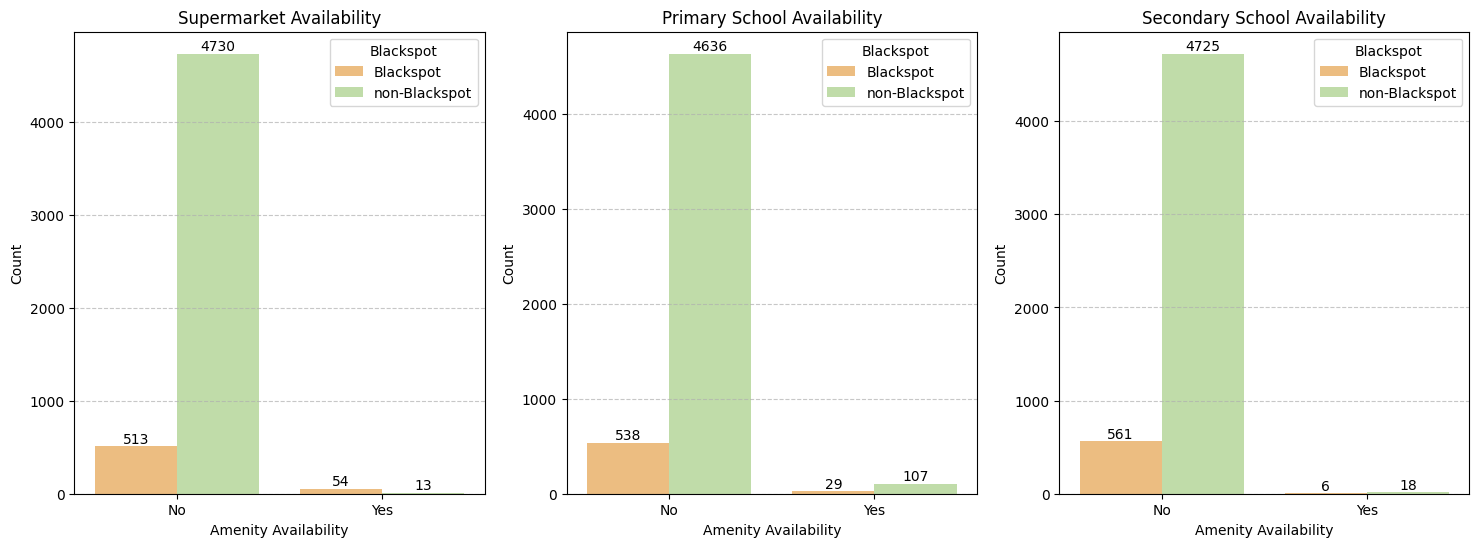

In [51]:
amenities_cols = ['has_supermarket', 'has_primary_school', 'has_secondary_school']

custom_amenities_countplot_titles = {
    'has_supermarket': "Supermarket Availability",
    'has_primary_school': "Primary School Availability",
    'has_secondary_school': "Secondary School Availability"
}

plt.figure(figsize=(18, 6))

for i, col in enumerate(amenities_cols):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(data=blackspot_dataset, x=col, hue='blackspot', palette='Spectral')
    plt.title(custom_amenities_countplot_titles[col])  # Set custom title for each subplot
    plt.xlabel("Amenity Availability")
    plt.ylabel("Count")
    plt.legend(title="Blackspot", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add counts above each bar in the countplot
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

    # Calculate percentages of blackspot and non-blackspot for each "Yes" and "No" option
    grouped_counts = blackspot_dataset.groupby([col, 'blackspot']).size().unstack()
    total_counts = grouped_counts.sum(axis=1)
    percentages = grouped_counts.div(total_counts, axis=0) * 100

    # Calculate the percentage of blackspot and non-blackspot cases for each amenity option and print out the results
    print(f"Amenity: {col}")
    for option, (yes_percent, no_percent) in percentages.iterrows():
        print(f"{option.capitalize()} - Blackspot: {yes_percent:.1f}%, Non-Blackspot: {no_percent:.1f}%")
    print()

plt.show()

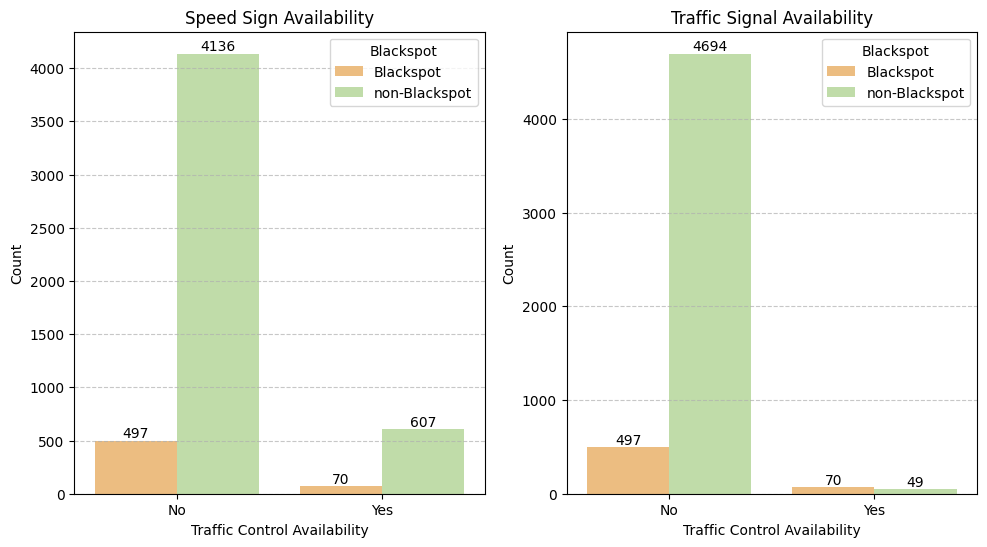

In [52]:
# Visualize distribution of Black Spot by Traffic Control Availability
traffic_control_cols = ['has_speed_sign', 'has_traffic_signal']

custom_traffic_control_countplot_titles = {
    'has_speed_sign': "Speed Sign Availability",
    'has_traffic_signal': "Traffic Signal Availability",
}

plt.figure(figsize=(18, 6))  # Increase the figure size to fit subplots

for i, col in enumerate(traffic_control_cols):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(data=blackspot_dataset, x=col, hue='blackspot', palette='Spectral')
    plt.title(custom_traffic_control_countplot_titles[col])
    plt.xlabel("Traffic Control Availability")
    plt.ylabel("Count")
    plt.legend(title="Blackspot", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add counts above each bar in the countplot
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.show()

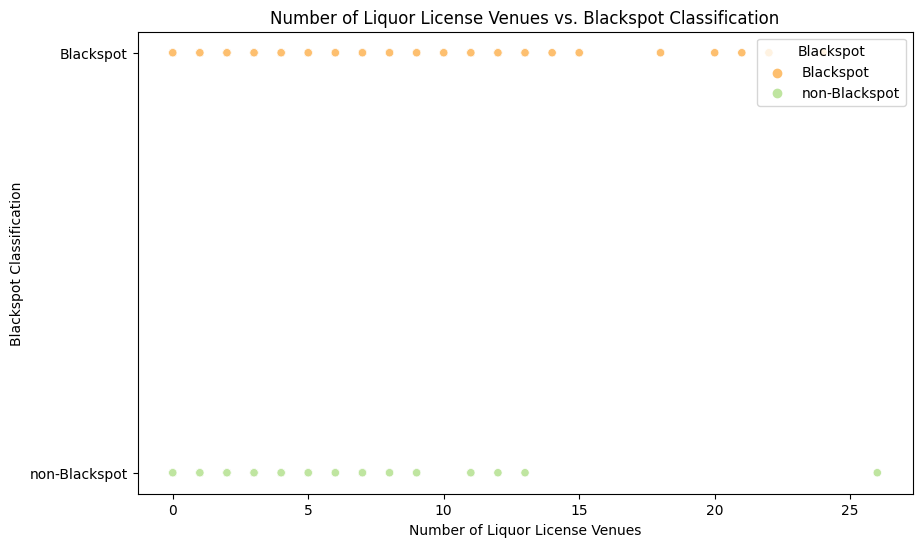

Number of Blackspot cases with Liquor License Venues > 0: 235
Total Number of Blackspot cases: 567
Percentage of Blackspot cases with Liquor License Venues > 0: 41.4%

Number of Non-Blackspot cases with Liquor License Venues > 0: 447
Total Number of Non-Blackspot cases: 4743
Percentage of Non-Blackspot cases with Liquor License Venues > 0: 9.4%


In [53]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=blackspot_dataset, x='liquor_license_venues', y='blackspot', hue='blackspot', palette='Spectral')

plt.title("Number of Liquor License Venues vs. Blackspot Classification")
plt.xlabel("Number of Liquor License Venues")
plt.ylabel("Blackspot Classification")
plt.legend(title="Blackspot", loc='upper right')

plt.show()

# Count number of liquor license venues > 0 for blackspot and non-blackspot
blackspot_with_liquor_count = blackspot_dataset[(blackspot_dataset['blackspot'] == 'Blackspot') & (blackspot_dataset['liquor_license_venues'] > 0)].shape[0]
non_blackspot_with_liquor_count = blackspot_dataset[(blackspot_dataset['blackspot'] == 'non-Blackspot') & (blackspot_dataset['liquor_license_venues'] > 0)].shape[0]

# Count total number of blackspot and non-blackspot cases
total_blackspot_count = blackspot_dataset[blackspot_dataset['blackspot'] == 'Blackspot'].shape[0]
total_non_blackspot_count = blackspot_dataset[blackspot_dataset['blackspot'] == 'non-Blackspot'].shape[0]

# Calculate percentages
blackspot_with_liquor_percent = (blackspot_with_liquor_count / total_blackspot_count) * 100
non_blackspot_with_liquor_percent = (non_blackspot_with_liquor_count / total_non_blackspot_count) * 100

# Print the results
print(f"Number of Blackspot cases with Liquor License Venues > 0: {blackspot_with_liquor_count}")
print(f"Total Number of Blackspot cases: {total_blackspot_count}")
print(f"Percentage of Blackspot cases with Liquor License Venues > 0: {blackspot_with_liquor_percent:.1f}%")
print(f"\nNumber of Non-Blackspot cases with Liquor License Venues > 0: {non_blackspot_with_liquor_count}")
print(f"Total Number of Non-Blackspot cases: {total_non_blackspot_count}")
print(f"Percentage of Non-Blackspot cases with Liquor License Venues > 0: {non_blackspot_with_liquor_percent:.1f}%")

## **4.3. Encode Data - Convert Categorical Data to Numeric**

In [54]:
# View unique categories in the 'road_type' column
print("Unique categories in 'road_type' column:")
print(blackspot_dataset['road_type'].unique())

# View unique categories in the 'intersection' column
print("\nUnique categories in 'intersection' column:")
print(blackspot_dataset['intersection'].unique())

# View unique categories in the 'blackspot' column
print("\nUnique categories in 'blackspot' column:")
print(blackspot_dataset['blackspot'].unique())

Unique categories in 'road_type' column:
['ROAD' 'STREET' 'HIGHWAY' 'DRIVE' 'WAY' 'FREEWAY']

Unique categories in 'intersection' column:
['non-Intersection' 'Intersection']

Unique categories in 'blackspot' column:
['Blackspot' 'non-Blackspot']


In [56]:
# Convert the 'road_type' column into dummy variables
blackspot_dataset = pd.get_dummies(blackspot_dataset, columns=['road_type'], prefix='road_type')
blackspot_dataset = blackspot_dataset.rename(columns=lambda x: x.lower())

In [57]:
# Convert 'intersection' column to binary numeric representation
blackspot_dataset['intersection'].replace(
    ['Intersection', 'non-Intersection'],
    [1, 0],
    inplace=True)

In [58]:
# Convert 'blackspot' column to binary numeric representation
blackspot_dataset['blackspot'].replace(
    ['Blackspot', 'non-Blackspot'],
    [1, 0],
    inplace=True)

In [59]:
# Reorder the columns in the blackspot_dataset DataFrame
first_three_columns = ['id', 'full_road_name', 'road_name']
road_type_columns = ['road_type_road', 'road_type_street', 'road_type_highway', 'road_type_drive', 'road_type_way', 'road_type_freeway']
new_column_order = first_three_columns + road_type_columns
blackspot_dataset = blackspot_dataset.reindex(columns=new_column_order + [col for col in blackspot_dataset.columns if col not in new_column_order])

In [60]:
# Define a dictionary to map "Yes" to 1 and "No" to "0"
binary_mapping = {"Yes": 1, "No": 0}

# Convert the columns to "1" and "0" using the mapping
blackspot_dataset['has_supermarket'] = blackspot_dataset['has_supermarket'].replace(binary_mapping)
blackspot_dataset['has_primary_school'] = blackspot_dataset['has_primary_school'].replace(binary_mapping)
blackspot_dataset['has_secondary_school'] = blackspot_dataset['has_secondary_school'].replace(binary_mapping)
blackspot_dataset['has_speed_sign'] = blackspot_dataset['has_speed_sign'].replace(binary_mapping)
blackspot_dataset['has_traffic_signal'] = blackspot_dataset['has_traffic_signal'].replace(binary_mapping)

print(blackspot_dataset.sample(5))

        id      full_road_name      road_name  road_type_road  road_type_street  road_type_highway  road_type_drive  road_type_way  road_type_freeway  age_less_15  age_15_24  age_25_44  age_45_64  age_18_plus  age_65_plus  english_speakers  couples_with_children  couples_no_children  single_parent_households  no_cars_households  one_car_households  two_plus_car_households  separate_houses  semi_detached_terrace_houses  apartments_flats_units  white_collar_occupation  blue_collar_occupation  socioeconomic_index  commercial_land_use  industrial_land_use  residential_land_use  parkland_land_use  primary_production_land_use  liquor_license_venues  intersection  has_supermarket  has_primary_school  has_secondary_school  has_speed_sign  has_traffic_signal  blackspot
3222  7606     WAVERLEY STREET       WAVERLEY               0                 1                  0                0              0                  0        0.142      0.090      0.209      0.328        0.817        0.230        

In [61]:
print(blackspot_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5325
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5310 non-null   int64  
 1   full_road_name                5310 non-null   object 
 2   road_name                     5310 non-null   object 
 3   road_type_road                5310 non-null   uint8  
 4   road_type_street              5310 non-null   uint8  
 5   road_type_highway             5310 non-null   uint8  
 6   road_type_drive               5310 non-null   uint8  
 7   road_type_way                 5310 non-null   uint8  
 8   road_type_freeway             5310 non-null   uint8  
 9   age_less_15                   5310 non-null   float64
 10  age_15_24                     5310 non-null   float64
 11  age_25_44                     5310 non-null   float64
 12  age_45_64                     5310 non-null   float64
 13  age

In [62]:
# Convert the selected columns from uint8 to int64
columns_to_convert = ['road_type_road', 'road_type_street', 'road_type_highway', 'road_type_drive', 'road_type_way', 'road_type_freeway']
blackspot_dataset[columns_to_convert] = blackspot_dataset[columns_to_convert].astype('int64')

print(blackspot_dataset.info())
print('\nSample size:', blackspot_dataset.shape[0])
print('Number of columns:', blackspot_dataset.shape[1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5325
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5310 non-null   int64  
 1   full_road_name                5310 non-null   object 
 2   road_name                     5310 non-null   object 
 3   road_type_road                5310 non-null   int64  
 4   road_type_street              5310 non-null   int64  
 5   road_type_highway             5310 non-null   int64  
 6   road_type_drive               5310 non-null   int64  
 7   road_type_way                 5310 non-null   int64  
 8   road_type_freeway             5310 non-null   int64  
 9   age_less_15                   5310 non-null   float64
 10  age_15_24                     5310 non-null   float64
 11  age_25_44                     5310 non-null   float64
 12  age_45_64                     5310 non-null   float64
 13  age

In [63]:
blackspot_dataset.sample(10)

,id,full_road_name,road_name,road_type_road,road_type_street,road_type_highway,road_type_drive,road_type_way,road_type_freeway,age_less_15,age_15_24,age_25_44,age_45_64,age_18_plus,age_65_plus,english_speakers,couples_with_children,couples_no_children,single_parent_households,no_cars_households,one_car_households,two_plus_car_households,separate_houses,semi_detached_terrace_houses,apartments_flats_units,white_collar_occupation,blue_collar_occupation,socioeconomic_index,commercial_land_use,industrial_land_use,residential_land_use,parkland_land_use,primary_production_land_use,liquor_license_venues,intersection,has_supermarket,has_primary_school,has_secondary_school,has_speed_sign,has_traffic_signal,blackspot
1361,6972,DARNUM-ALLAMBEE ROAD,DARNUM-ALLAMBEE,1,0,0,0,0,0,0.168,0.133,0.231,0.309,0.794,0.158,0.928,0.452,0.471,0.058,0.000,0.172,0.797,1.000,0.000,0.000,0.638,0.314,1026,0.000,0.000,0.000,0.000,1.000,0.000,1,0,0,0,0,0,0
1896,7763,PRINCES FREEWAY,PRINCES,0,0,0,0,0,1,0.248,0.104,0.269,0.206,0.722,0.173,0.885,0.411,0.463,0.142,0.013,0.302,0.634,0.957,0.017,0.026,0.636,0.337,993,0.000,0.000,0.470,0.000,0.530,0.000,0,0,0,0,1,0,0
1983,3169,HENDERSON STREET,HENDERSON,0,1,0,0,0,0,0.125,0.043,0.128,0.345,0.854,0.359,0.883,0.595,0.329,0.038,0.000,0.449,0.517,1.000,0.000,0.000,0.646,0.257,1015,0.000,0.000,0.966,0.000,0.034,0.000,0,0,0,0,0,0,0
945,7976,HOWARDS ROAD,HOWARDS,1,0,0,0,0,0,0.191,0.112,0.143,0.386,0.773,0.167,0.920,0.521,0.493,0.056,0.000,0.075,0.887,1.000,0.000,0.000,0.610,0.350,1036,0.000,0.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0
4465,4161,DIXON STREET,DIXON,0,1,0,0,0,0,0.119,0.056,0.126,0.276,0.877,0.423,0.889,0.648,0.258,0.102,0.057,0.471,0.429,0.811,0.189,0.000,0.558,0.309,947,0.000,0.000,1.000,0.000,0.000,0.000,0,0,0,0,0,0,0
3494,8524,CHARLTON ROAD,CHARLTON,1,0,0,0,0,0,0.310,0.106,0.267,0.220,0.636,0.097,0.937,0.263,0.677,0.068,0.000,0.197,0.776,1.000,0.000,0.000,0.562,0.404,1012,0.000,0.000,0.340,0.196,0.464,0.000,0,0,0,0,0,0,0
273,4682,SOUTH MAIN ROAD,SOUTH MAIN,1,0,0,0,0,0,0.140,0.108,0.188,0.384,0.808,0.180,0.930,0.443,0.486,0.057,0.000,0.174,0.793,1.000,0.000,0.000,0.616,0.352,1028,0.000,0.000,0.000,1.000,0.000,0.000,0,0,0,0,0,0,0
3311,6448,MAIN SOUTH ROAD,MAIN SOUTH,1,0,0,0,0,0,0.208,0.108,0.188,0.268,0.764,0.228,0.941,0.455,0.411,0.134,0.000,0.218,0.744,0.980,0.000,0.000,0.656,0.333,996,0.000,0.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0
3379,9291,GARDNER AND HOLMAN ROAD,GARDNER AND HOLMAN,1,0,0,0,0,0,0.193,0.090,0.220,0.307,0.765,0.190,0.888,0.437,0.529,0.034,0.000,0.132,0.868,1.000,0.000,0.000,0.609,0.391,1003,0.000,0.000,0.920,0.000,0.080,0.000,0,0,0,0,0,0,0
1854,2957,YARRAMUNDI WAY,YARRAMUNDI,0,0,0,0,1,0,0.130,0.051,0.171,0.223,0.854,0.424,0.875,0.523,0.271,0.194,0.097,0.385,0.466,0.888,0.087,0.025,0.595,0.414,921,0.000,0.000,1.000,0.000,0.000,0.000,0,0,0,0,0,0,0


## **4.4. Multivariate Analysis**

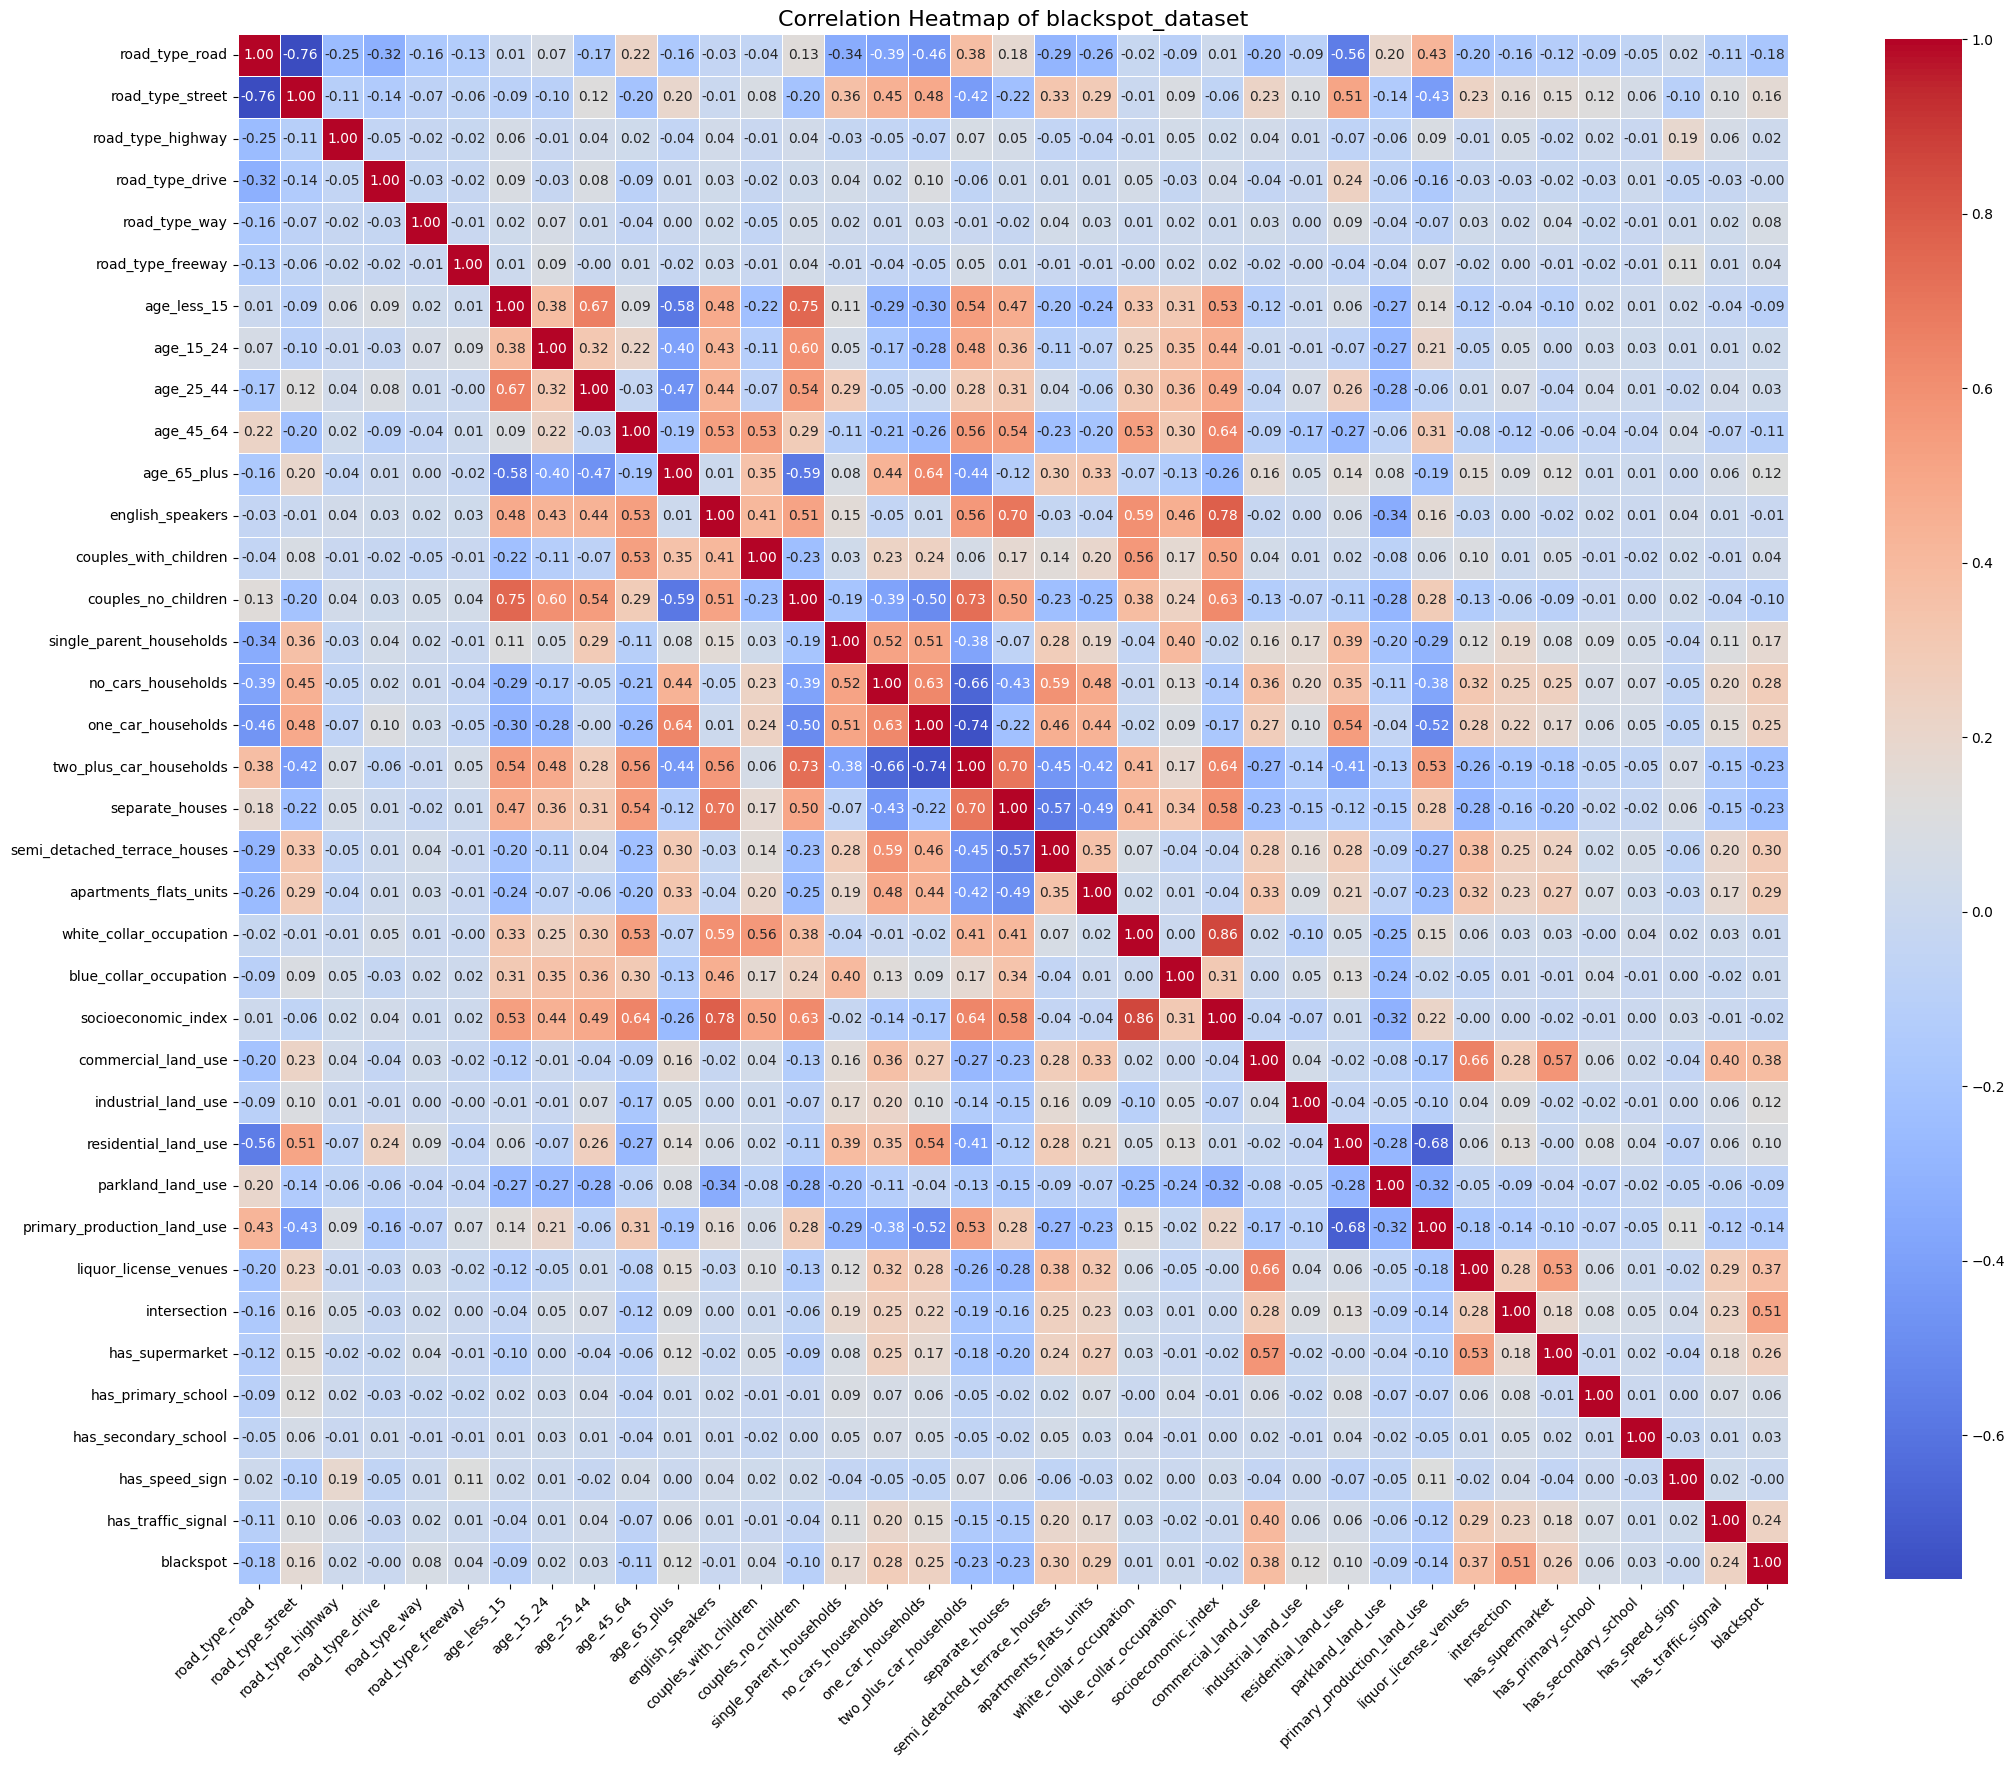

In [64]:
# Remove irrelevant columns and calculate correlation matrix
correlation_data = blackspot_dataset.drop(['id', 'age_18_plus', 'full_road_name', 'road_name'], axis=1)
correlation_matrix = correlation_data.corr(numeric_only=True)

# Create and display correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of blackspot_dataset", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

road_type_road                 -0.181
road_type_street                0.164
road_type_highway               0.020
road_type_drive                -0.001
road_type_way                   0.075
road_type_freeway               0.036
age_less_15                    -0.093
age_15_24                       0.025
age_25_44                       0.031
age_45_64                      -0.109
age_65_plus                     0.116
english_speakers               -0.010
couples_with_children           0.037
couples_no_children            -0.101
single_parent_households        0.173
no_cars_households              0.283
one_car_households              0.246
two_plus_car_households        -0.232
separate_houses                -0.228
semi_detached_terrace_houses    0.295
apartments_flats_units          0.288
white_collar_occupation         0.007
blue_collar_occupation          0.011
socioeconomic_index            -0.023
commercial_land_use             0.380
industrial_land_use             0.120
residential_

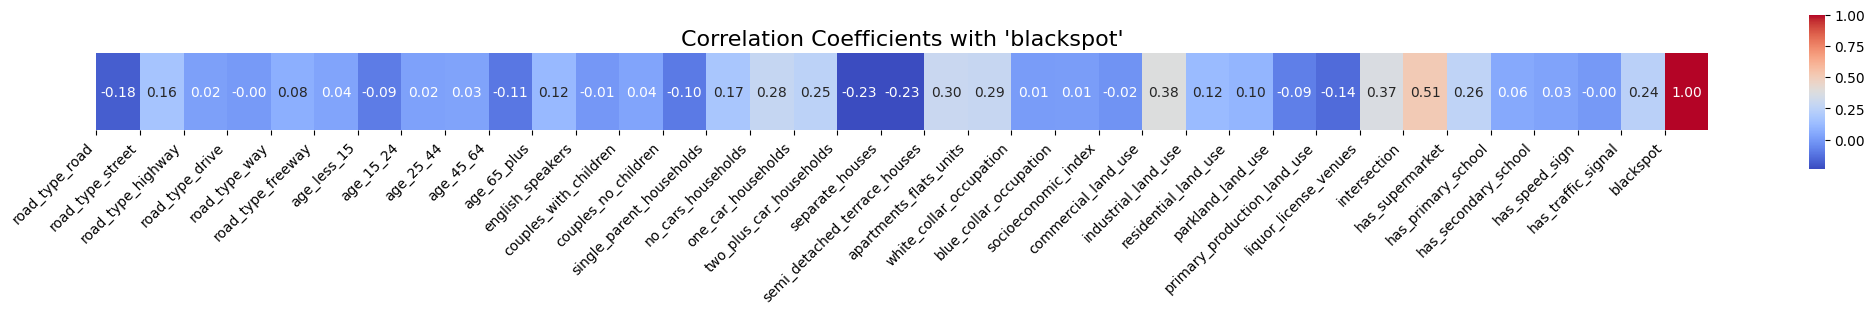

In [65]:
# Extract correlation coefficients for 'blackspot' only
blackspot_correlation = correlation_matrix['blackspot']
print(blackspot_correlation)

# Reshape the correlation values for heatmap visualization
correlation_values = blackspot_correlation.values.reshape(1, -1)

# Create heatmap for the extracted correlation coefficients
plt.figure(figsize=(26, 1))
sns.heatmap(correlation_values, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={"shrink": 2, "aspect": 10})
plt.title("Correlation Coefficients with 'blackspot'", fontsize=16)
plt.xticks(range(len(blackspot_correlation)), blackspot_correlation.index, rotation=45, ha='right', fontsize=10)
plt.yticks([])
plt.show()

# **6. Implement Model and Evaluate Model Performance**

## **6.1. Initial Feature Selection and Model Building**

### **6.1.1. Split the Dataset**

In [66]:
blackspot_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 0 to 5325
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5310 non-null   int64  
 1   full_road_name                5310 non-null   object 
 2   road_name                     5310 non-null   object 
 3   road_type_road                5310 non-null   int64  
 4   road_type_street              5310 non-null   int64  
 5   road_type_highway             5310 non-null   int64  
 6   road_type_drive               5310 non-null   int64  
 7   road_type_way                 5310 non-null   int64  
 8   road_type_freeway             5310 non-null   int64  
 9   age_less_15                   5310 non-null   float64
 10  age_15_24                     5310 non-null   float64
 11  age_25_44                     5310 non-null   float64
 12  age_45_64                     5310 non-null   float64
 13  age

In [67]:
# Drop the 'blackspot' column from the DataFrame to consider only other variables
all_features = correlation_matrix['blackspot'].drop('blackspot')

# Calculate the threshold for absolute values within the top 25%
threshold = all_features.abs().quantile(0.75)

# Select variables that have absolute values within the top 25%
selected_features_1 = all_features[all_features.abs() >= threshold].index.tolist()

# Print the selected features
print("Selected features with absolute value in top 25%:")
print(selected_features_1)

number_of_selected_features = len(selected_features_1)
print("\nNumber of features in selected_features_1:", number_of_selected_features)

Selected features with absolute value in top 25%:
['no_cars_households', 'one_car_households', 'semi_detached_terrace_houses', 'apartments_flats_units', 'commercial_land_use', 'liquor_license_venues', 'intersection', 'has_supermarket', 'has_traffic_signal']

Number of features in selected_features_1: 9


In [68]:
# Select relevant predictors
X = blackspot_dataset[selected_features_1]

# Select the target variable for prediction
y = blackspot_dataset['blackspot']

In [69]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2912)

In [70]:
# Inspect the split datasets
print("Training dataset - Features:")
print(X_train.head())
print("\nTraining dataset - Target:")
print(y_train.head())

print("\nTraining dataset size:", X_train.shape)
print("Test dataset size:", X_test.shape)

Training dataset - Features:
      no_cars_households  one_car_households  semi_detached_terrace_houses  apartments_flats_units  commercial_land_use  liquor_license_venues  intersection  has_supermarket  has_traffic_signal
2974               0.000               0.000                         0.000                   0.000                0.000                  0.000             0                0                   0
1314               0.067               0.215                         0.000                   0.000                0.000                  0.000             0                0                   0
239                0.000               0.231                         0.000                   0.000                0.000                  0.000             0                0                   0
2535               0.097               0.385                         0.087                   0.025                0.000                  0.000             0                0                   0
1

### **6.1.2. Train a Logistic Regression Model and Make Predictions**

In [71]:
# Use statsmodels to fit the logistic regression model
X_train_with_const = sm.add_constant(X_train)  # Adding a constant term for the intercept
sm_model_1 = sm.Logit(y_train, X_train_with_const)
sm_results_1 = sm_model_1.fit()

# Print the summary of the logistic regression model
print(sm_results_1.summary())

Optimization terminated successfully.
         Current function value: 0.222588
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              blackspot   No. Observations:                 4248
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            9
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.3462
Time:                        12:42:39   Log-Likelihood:                -945.55
converged:                       True   LL-Null:                       -1446.1
Covariance Type:            nonrobust   LLR p-value:                9.623e-210
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.6265      0.168    -21.530      0.000

In [72]:
# Create a Logistic Regression object
LR1_model = LogisticRegression()

In [73]:
# Perform cross-validation for Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2912)
LR1_cv_accuracy = cross_val_score(LR1_model, X, y, cv=cv, scoring='accuracy')
LR1_cv_precision = cross_val_score(LR1_model, X, y, cv=cv, scoring='precision')
LR1_cv_recall = cross_val_score(LR1_model, X, y, cv=cv, scoring='recall')
LR1_cv_f1 = cross_val_score(LR1_model, X, y, cv=cv, scoring='f1')

In [74]:
# Perform Logistic Regression
LR1_model.fit(X_train, y_train)

LogisticRegression()

In [75]:
# Perform prediction using the test dataset
LR1_y_pred = LR1_model.predict(X_test)

In [76]:
# Create a new DataFrame 'inspection' containing X_test and the true and predicted values
LR1_inspection = X_test.assign(actual_blackspot_result=y_test, predicted_blackspot_result=LR1_y_pred)
LR1_inspection.head(10)

,no_cars_households,one_car_households,semi_detached_terrace_houses,apartments_flats_units,commercial_land_use,liquor_license_venues,intersection,has_supermarket,has_traffic_signal,actual_blackspot_result,predicted_blackspot_result
1299,0.037,0.337,0.067,0.024,0.000,3.000,0,0,0,0,0
4494,0.042,0.156,0.000,0.000,0.000,2.000,0,0,0,0,0
967,0.075,0.492,0.302,0.056,0.000,0.000,0,0,0,1,0
2036,0.000,0.103,0.000,0.000,0.000,0.000,0,0,0,0,0
2727,0.000,0.301,0.000,0.000,0.000,0.000,0,0,0,0,0
1242,0.000,0.176,0.000,0.000,0.000,0.000,0,0,0,0,0
3000,0.059,0.398,0.000,0.044,0.000,3.000,0,0,0,0,0
708,0.000,0.238,0.000,0.000,0.000,1.000,0,0,0,0,0
1275,0.000,0.301,0.000,0.000,0.000,0.000,0,0,0,0,0
175,0.041,0.400,0.012,0.032,0.000,2.000,0,0,0,0,0


### **6.1.3. Evaluate Performance of Logistic Regression Model**

In [77]:
# Calculate Accuracy, Precision, Recall and F1 Score
LR1_accuracy = accuracy_score(y_test, LR1_y_pred)
LR1_precision = precision_score(y_test, LR1_y_pred)
LR1_recall = recall_score(y_test, LR1_y_pred)
LR1_f1 = f1_score(y_test, LR1_y_pred)

# Print the results for Logistic Regression
print("Iteration 1 - Logistic Regression Metrics:")
print(f"Accuracy: {LR1_accuracy:.3f}")
print(f"Precision: {LR1_precision:.3f}")
print(f"Recall: {LR1_recall:.3f}")
print(f"F1 Score: {LR1_f1:.3f}")

Iteration 1 - Logistic Regression Metrics:
Accuracy: 0.913
Precision: 0.667
Recall: 0.357
F1 Score: 0.465


In [78]:
# Display the Confusion Matrix
LR1_confusion_matrix = confusion_matrix(y_test, LR1_y_pred)
print(LR1_confusion_matrix)

[[930  20]
 [ 72  40]]


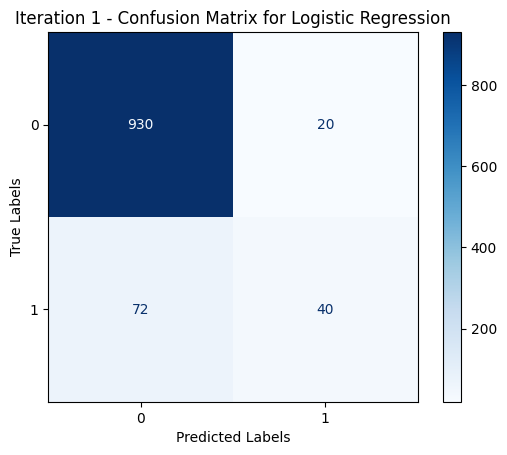

In [79]:
# Plot the Confusion Matrix
LR1_cm_display = ConfusionMatrixDisplay(confusion_matrix=LR1_confusion_matrix, display_labels=LR1_model.classes_)
LR1_cm_display.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Iteration 1 - Confusion Matrix for Logistic Regression')
plt.show()

In [80]:
# Print the classification report for detailed metrics
print("Iteration 1 - Classification Report for Logistic Regression:")
print(classification_report(y_test, LR1_y_pred))

Iteration 1 - Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       950
           1       0.67      0.36      0.47       112

    accuracy                           0.91      1062
   macro avg       0.80      0.67      0.71      1062
weighted avg       0.90      0.91      0.90      1062



In [81]:
# Print the cross-validation results for Logistic Regression
print("Iteration 1 - Cross-Validation Metrics for Logistic Regression:")
print(f"Accuracy: {LR1_cv_accuracy.mean():.3f} +/- {LR1_cv_accuracy.std():.3f}")
print(f"Precision: {LR1_cv_precision.mean():.3f} +/- {LR1_cv_precision.std():.3f}")
print(f"Recall: {LR1_cv_recall.mean():.3f} +/- {LR1_cv_recall.std():.3f}")
print(f"F1 Score: {LR1_cv_f1.mean():.3f} +/- {LR1_cv_f1.std():.3f}")

Iteration 1 - Cross-Validation Metrics for Logistic Regression:
Accuracy: 0.918 +/- 0.007
Precision: 0.720 +/- 0.066
Recall: 0.376 +/- 0.060
F1 Score: 0.491 +/- 0.059


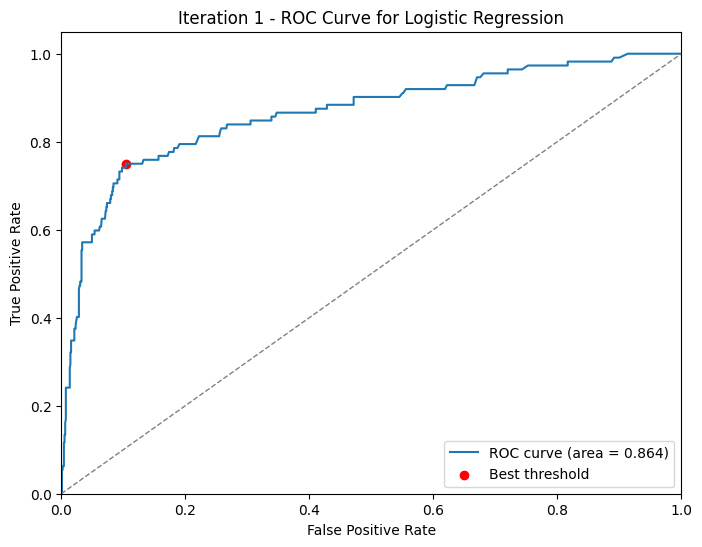

Best threshold: 0.07418995850391812


In [82]:
# Get the probabilities for the positive class (blackspot = 1)
y_pred_probs = LR1_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
LR1_fpr, LR1_tpr, LR1_thresholds = roc_curve(y_test, y_pred_probs)
LR1_roc_auc = roc_auc_score(y_test, y_pred_probs)

# Find best threshold based on the distance between tpr - fpr
optimal_idx = (LR1_tpr - LR1_fpr).argmax()
best_threshold_1 = LR1_thresholds[optimal_idx]

# Plot the ROC curve and the best point
plt.figure(figsize=(8, 6))
plt.plot(LR1_fpr, LR1_tpr, label='ROC curve (area = %0.3f)' % LR1_roc_auc)
plt.scatter(LR1_fpr[optimal_idx], LR1_tpr[optimal_idx], marker='o', color='red', label='Best threshold')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Iteration 1 - ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Print the best threshold
print('Best threshold:', best_threshold_1)

## **6.2. Second Round of Feature Selection and Model Refinement**

### **6.2.1. Split the Dataset**

In [83]:
# Select feature for second round of feature selection
selected_features_2 = [feature for feature in selected_features_1 if feature != 'no_cars_households']

print(selected_features_2)

number_of_selected_features = len(selected_features_2)
print("\nNumber of features in selected_features_2:", number_of_selected_features)

['one_car_households', 'semi_detached_terrace_houses', 'apartments_flats_units', 'commercial_land_use', 'liquor_license_venues', 'intersection', 'has_supermarket', 'has_traffic_signal']

Number of features in selected_features_2: 8


In [84]:
# Select relevant predictors
X = blackspot_dataset[selected_features_2]

# Select the target variable for prediction
y = blackspot_dataset['blackspot']

In [85]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2912)

In [86]:
# Inspect the split datasets
print("Training dataset - Features:")
print(X_train.head())
print("\nTraining dataset - Target:")
print(y_train.head())

print("\nTraining dataset size:", X_train.shape)
print("Test dataset size:", X_test.shape)

Training dataset - Features:
      one_car_households  semi_detached_terrace_houses  apartments_flats_units  commercial_land_use  liquor_license_venues  intersection  has_supermarket  has_traffic_signal
2974               0.000                         0.000                   0.000                0.000                  0.000             0                0                   0
1314               0.215                         0.000                   0.000                0.000                  0.000             0                0                   0
239                0.231                         0.000                   0.000                0.000                  0.000             0                0                   0
2535               0.385                         0.087                   0.025                0.000                  0.000             0                0                   0
1850               0.115                         0.000                   0.000                0.000  

### **6.2.2. Train a Logistic Regression Model and Make Predictions**

In [87]:
# Use statsmodels to fit the logistic regression model
X_train_with_const = sm.add_constant(X_train)  # Adding a constant term for the intercept
sm_model_2 = sm.Logit(y_train, X_train_with_const)
sm_results_2 = sm_model_2.fit()

# Print the summary of the logistic regression model
print(sm_results_2.summary())

Optimization terminated successfully.
         Current function value: 0.222589
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              blackspot   No. Observations:                 4248
Model:                          Logit   Df Residuals:                     4239
Method:                           MLE   Df Model:                            8
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.3462
Time:                        12:42:41   Log-Likelihood:                -945.56
converged:                       True   LL-Null:                       -1446.1
Covariance Type:            nonrobust   LLR p-value:                8.371e-211
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.6242      0.167    -21.730      0.000

In [88]:
# Create a Logistic Regression object
LR2_model = LogisticRegression()

In [89]:
# Perform cross-validation for Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2912)
LR2_cv_accuracy = cross_val_score(LR2_model, X, y, cv=cv, scoring='accuracy')
LR2_cv_precision = cross_val_score(LR2_model, X, y, cv=cv, scoring='precision')
LR2_cv_recall = cross_val_score(LR2_model, X, y, cv=cv, scoring='recall')
LR2_cv_f1 = cross_val_score(LR2_model, X, y, cv=cv, scoring='f1')

In [90]:
# Perform Logistic Regression
LR2_model.fit(X_train, y_train)

LogisticRegression()

In [91]:
# Perform prediction using the test dataset
LR2_y_pred = LR2_model.predict(X_test)

In [92]:
# Create a new DataFrame 'inspection' containing X_test and the true and predicted values
LR2_inspection = X_test.assign(actual_blackspot_result=y_test, predicted_blackspot_result=LR2_y_pred)
LR2_inspection.head(10)

,one_car_households,semi_detached_terrace_houses,apartments_flats_units,commercial_land_use,liquor_license_venues,intersection,has_supermarket,has_traffic_signal,actual_blackspot_result,predicted_blackspot_result
1299,0.337,0.067,0.024,0.000,3.000,0,0,0,0,0
4494,0.156,0.000,0.000,0.000,2.000,0,0,0,0,0
967,0.492,0.302,0.056,0.000,0.000,0,0,0,1,0
2036,0.103,0.000,0.000,0.000,0.000,0,0,0,0,0
2727,0.301,0.000,0.000,0.000,0.000,0,0,0,0,0
1242,0.176,0.000,0.000,0.000,0.000,0,0,0,0,0
3000,0.398,0.000,0.044,0.000,3.000,0,0,0,0,0
708,0.238,0.000,0.000,0.000,1.000,0,0,0,0,0
1275,0.301,0.000,0.000,0.000,0.000,0,0,0,0,0
175,0.400,0.012,0.032,0.000,2.000,0,0,0,0,0


### **6.2.3. Evaluate Performance of Logistic Regression Model**

In [93]:
# Calculate Accuracy, Precision, Recall and F1 Score
LR2_accuracy = accuracy_score(y_test, LR2_y_pred)
LR2_precision = precision_score(y_test, LR2_y_pred)
LR2_recall = recall_score(y_test, LR2_y_pred)
LR2_f1 = f1_score(y_test, LR2_y_pred)

# Print the results for Logistic Regression
print("Iteration 2 - Logistic Regression Metrics:")
print(f"Accuracy: {LR2_accuracy:.3f}")
print(f"Precision: {LR2_precision:.3f}")
print(f"Recall: {LR2_recall:.3f}")
print(f"F1 Score: {LR2_f1:.3f}")

Iteration 2 - Logistic Regression Metrics:
Accuracy: 0.912
Precision: 0.661
Recall: 0.348
F1 Score: 0.456


In [94]:
# Display the Confusion Matrix
LR2_confusion_matrix = confusion_matrix(y_test, LR2_y_pred)
print(LR2_confusion_matrix)

[[930  20]
 [ 73  39]]


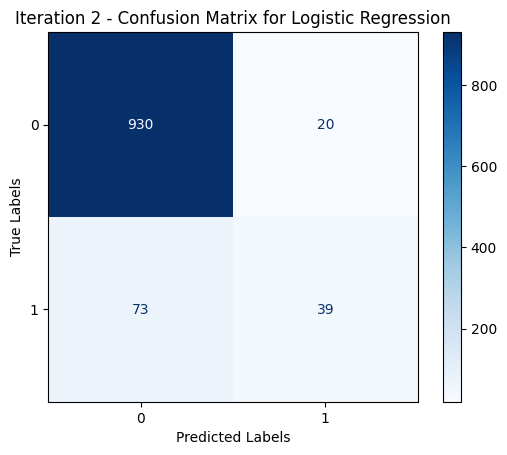

In [95]:
# Plot the Confusion Matrix
LR2_cm_display = ConfusionMatrixDisplay(confusion_matrix=LR2_confusion_matrix, display_labels=LR2_model.classes_)
LR2_cm_display.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Iteration 2 - Confusion Matrix for Logistic Regression')
plt.show()

In [96]:
# Print the classification report for detailed metrics
print("Iteration 2 - Classification Report for Logistic Regression:")
print(classification_report(y_test, LR2_y_pred))

Iteration 2 - Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       950
           1       0.66      0.35      0.46       112

    accuracy                           0.91      1062
   macro avg       0.79      0.66      0.70      1062
weighted avg       0.90      0.91      0.90      1062



In [97]:
# Print the cross-validation results for Logistic Regression
print("Iteration 2 - Cross-Validation Metrics for Logistic Regression:")
print(f"Accuracy: {LR2_cv_accuracy.mean():.3f} +/- {LR2_cv_accuracy.std():.3f}")
print(f"Precision: {LR2_cv_precision.mean():.3f} +/- {LR2_cv_precision.std():.3f}")
print(f"Recall: {LR2_cv_recall.mean():.3f} +/- {LR2_cv_recall.std():.3f}")
print(f"F1 Score: {LR2_cv_f1.mean():.3f} +/- {LR2_cv_f1.std():.3f}")

Iteration 2 - Cross-Validation Metrics for Logistic Regression:
Accuracy: 0.918 +/- 0.007
Precision: 0.725 +/- 0.071
Recall: 0.374 +/- 0.061
F1 Score: 0.490 +/- 0.059


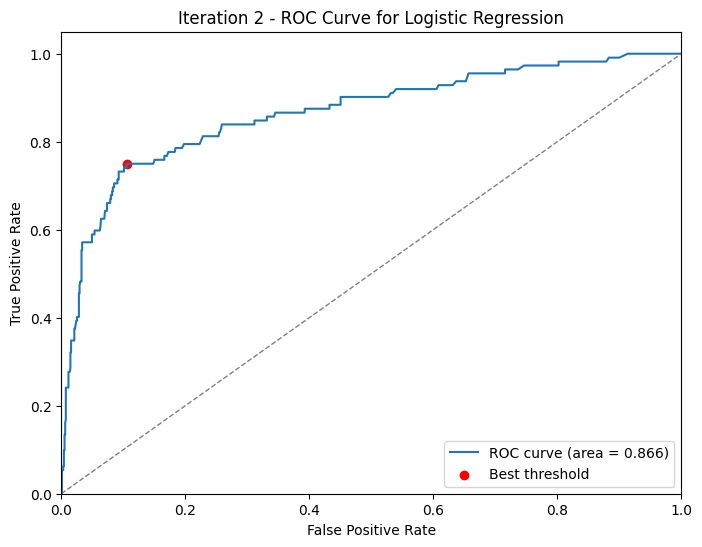

Best threshold: 0.07263734836040972


In [98]:
# Get the probabilities for the positive class (blackspot = 1)
y_pred_probs = LR2_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
LR2_fpr, LR2_tpr, LR2_thresholds = roc_curve(y_test, y_pred_probs)
LR2_roc_auc = roc_auc_score(y_test, y_pred_probs)

# Find best threshold based on the distance between tpr - fpr
optimal_idx = (LR2_tpr - LR2_fpr).argmax()
best_threshold_2 = LR2_thresholds[optimal_idx]

# Plot the ROC curve and the best point
plt.figure(figsize=(8, 6))
plt.plot(LR2_fpr, LR2_tpr, label='ROC curve (area = %0.3f)' % LR2_roc_auc)
plt.scatter(LR2_fpr[optimal_idx], LR2_tpr[optimal_idx], marker='o', color='red', label='Best threshold')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Iteration 2 - ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Print the best threshold
print('Best threshold:', best_threshold_2)

## **6.3. Final Round of Feature Selection and Model Refinement**

### **6.3.1. Split the Dataset**

In [99]:
# Select feature for final round of feature selection
selected_features_3 = [feature for feature in selected_features_2 if feature != 'has_supermarket']

print(selected_features_3)

number_of_selected_features = len(selected_features_3)
print("\nNumber of features in selected_features_3:", number_of_selected_features)

['one_car_households', 'semi_detached_terrace_houses', 'apartments_flats_units', 'commercial_land_use', 'liquor_license_venues', 'intersection', 'has_traffic_signal']

Number of features in selected_features_3: 7


In [100]:
# Select relevant predictors
X = blackspot_dataset[selected_features_3]

# Select the target variable for prediction
y = blackspot_dataset['blackspot']

In [101]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2912)

In [102]:
# Inspect the split datasets
print("Training dataset - Features:")
print(X_train.head())
print("\nTraining dataset - Target:")
print(y_train.head())

print("\nTraining dataset size:", X_train.shape)
print("Test dataset size:", X_test.shape)

Training dataset - Features:
      one_car_households  semi_detached_terrace_houses  apartments_flats_units  commercial_land_use  liquor_license_venues  intersection  has_traffic_signal
2974               0.000                         0.000                   0.000                0.000                  0.000             0                   0
1314               0.215                         0.000                   0.000                0.000                  0.000             0                   0
239                0.231                         0.000                   0.000                0.000                  0.000             0                   0
2535               0.385                         0.087                   0.025                0.000                  0.000             0                   0
1850               0.115                         0.000                   0.000                0.000                  0.000             0                   0

Training dataset - Target:
2

### **6.3.2. Train a Logistic Regression Model and Make Predictions**

In [103]:
# Use statsmodels to fit the logistic regression model
X_train_with_const = sm.add_constant(X_train)  # Adding a constant term for the intercept
sm_model_3 = sm.Logit(y_train, X_train_with_const)
sm_results_3 = sm_model_3.fit()

# Print the summary of the logistic regression model
print(sm_results_3.summary())

Optimization terminated successfully.
         Current function value: 0.222609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              blackspot   No. Observations:                 4248
Model:                          Logit   Df Residuals:                     4240
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.3461
Time:                        12:42:43   Log-Likelihood:                -945.64
converged:                       True   LL-Null:                       -1446.1
Covariance Type:            nonrobust   LLR p-value:                7.338e-212
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.6247      0.167    -21.732      0.000

In [104]:
# Create a Logistic Regression object
LR3_model = LogisticRegression()

In [105]:
# Perform cross-validation for Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2912)
LR3_cv_accuracy = cross_val_score(LR3_model, X, y, cv=cv, scoring='accuracy')
LR3_cv_precision = cross_val_score(LR3_model, X, y, cv=cv, scoring='precision')
LR3_cv_recall = cross_val_score(LR3_model, X, y, cv=cv, scoring='recall')
LR3_cv_f1 = cross_val_score(LR3_model, X, y, cv=cv, scoring='f1')

In [106]:
# Perform Logistic Regression
LR3_model.fit(X_train, y_train)

LogisticRegression()

In [107]:
# Perform prediction using the test dataset
LR3_y_pred = LR3_model.predict(X_test)

In [108]:
# Create a new DataFrame 'inspection' containing X_test and the true and predicted values
LR3_inspection = X_test.assign(actual_blackspot_result=y_test, predicted_blackspot_result=LR3_y_pred)
LR3_inspection.head(10)

,one_car_households,semi_detached_terrace_houses,apartments_flats_units,commercial_land_use,liquor_license_venues,intersection,has_traffic_signal,actual_blackspot_result,predicted_blackspot_result
1299,0.337,0.067,0.024,0.000,3.000,0,0,0,0
4494,0.156,0.000,0.000,0.000,2.000,0,0,0,0
967,0.492,0.302,0.056,0.000,0.000,0,0,1,0
2036,0.103,0.000,0.000,0.000,0.000,0,0,0,0
2727,0.301,0.000,0.000,0.000,0.000,0,0,0,0
1242,0.176,0.000,0.000,0.000,0.000,0,0,0,0
3000,0.398,0.000,0.044,0.000,3.000,0,0,0,0
708,0.238,0.000,0.000,0.000,1.000,0,0,0,0
1275,0.301,0.000,0.000,0.000,0.000,0,0,0,0
175,0.400,0.012,0.032,0.000,2.000,0,0,0,0


### **6.3.3. Evaluate Performance of Logistic Regression Model**

In [109]:
# Calculate Accuracy, Precision, Recall and F1 Score
LR3_accuracy = accuracy_score(y_test, LR3_y_pred)
LR3_precision = precision_score(y_test, LR3_y_pred)
LR3_recall = recall_score(y_test, LR3_y_pred)
LR3_f1 = f1_score(y_test, LR3_y_pred)

# Print the results for Logistic Regression
print("Iteration 3 - Logistic Regression Metrics:")
print(f"Accuracy: {LR3_accuracy:.3f}")
print(f"Precision: {LR3_precision:.3f}")
print(f"Recall: {LR3_recall:.3f}")
print(f"F1 Score: {LR3_f1:.3f}")

Iteration 3 - Logistic Regression Metrics:
Accuracy: 0.912
Precision: 0.661
Recall: 0.348
F1 Score: 0.456


In [110]:
# Display the Confusion Matrix
LR3_confusion_matrix = confusion_matrix(y_test, LR3_y_pred)
print(LR3_confusion_matrix)

[[930  20]
 [ 73  39]]


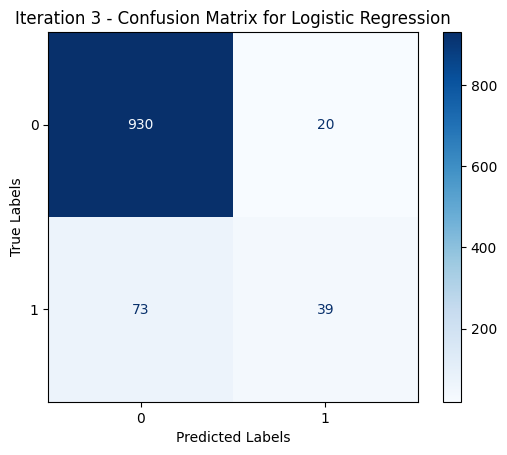

In [111]:
# Plot the Confusion Matrix
LR3_cm_display = ConfusionMatrixDisplay(confusion_matrix=LR3_confusion_matrix, display_labels=LR3_model.classes_)
LR3_cm_display.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Iteration 3 - Confusion Matrix for Logistic Regression')
plt.show()

In [112]:
# Print the classification report for detailed metrics
print("Iteration 3 - Classification Report for Logistic Regression:")
print(classification_report(y_test, LR3_y_pred))

Iteration 3 - Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       950
           1       0.66      0.35      0.46       112

    accuracy                           0.91      1062
   macro avg       0.79      0.66      0.70      1062
weighted avg       0.90      0.91      0.90      1062



In [113]:
# Print the cross-validation results for Logistic Regression
print("Iteration 3 - Cross-Validation Metrics for Logistic Regression:")
print(f"Accuracy: {LR3_cv_accuracy.mean():.3f} +/- {LR3_cv_accuracy.std():.3f}")
print(f"Precision: {LR3_cv_precision.mean():.3f} +/- {LR3_cv_precision.std():.3f}")
print(f"Recall: {LR3_cv_recall.mean():.3f} +/- {LR3_cv_recall.std():.3f}")
print(f"F1 Score: {LR3_cv_f1.mean():.3f} +/- {LR3_cv_f1.std():.3f}")

Iteration 3 - Cross-Validation Metrics for Logistic Regression:
Accuracy: 0.918 +/- 0.007
Precision: 0.726 +/- 0.074
Recall: 0.374 +/- 0.061
F1 Score: 0.490 +/- 0.058


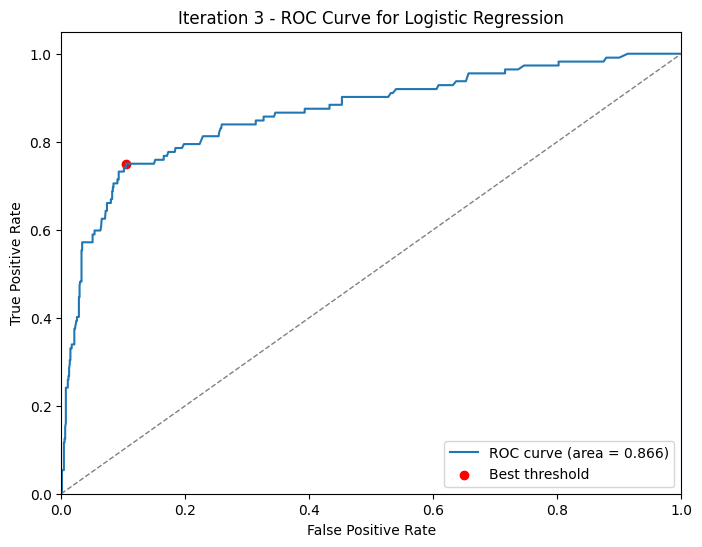

Best threshold: 0.07418302617769006


In [114]:
# Get the probabilities for the positive class (blackspot = 1)
y_pred_probs = LR3_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
LR3_fpr, LR3_tpr, LR3_thresholds = roc_curve(y_test, y_pred_probs)
LR3_roc_auc = roc_auc_score(y_test, y_pred_probs)

# Find best threshold based on the distance between tpr - fpr
optimal_idx = (LR3_tpr - LR3_fpr).argmax()
best_threshold_3 = LR3_thresholds[optimal_idx]

# Plot the ROC curve and the best point
plt.figure(figsize=(8, 6))
plt.plot(LR3_fpr, LR3_tpr, label='ROC curve (area = %0.3f)' % LR3_roc_auc)
plt.scatter(LR3_fpr[optimal_idx], LR3_tpr[optimal_idx], marker='o', color='red', label='Best threshold')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Iteration 3 - ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Print the best threshold
print('Best threshold:', best_threshold_3)